In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols
import sympy as sym
from sympy.solvers.solvers import unrad
from sympy import nroots
from scipy import linalg
import scipy as sci
from scipy import optimize
from scipy import stats
from scipy.interpolate import lagrange
from scipy.optimize import root
from scipy.optimize import minimize
from scipy.optimize import fixed_point

import time 
import mpmath as mp

In [2]:
#Henon map (x,y) -> (1 - a*x**2 + b*y,x)
def hMap(a,b,x,y):
    return 1 - a*x**2 + b*y
    
#define doing the henon map n times
def hMap_n(a,b,x,y,n):
    x_i = x
    y_i = y
    
    for i in range(n):
        old_x = x_i
        old_y = y_i
        
        new_x = hMap(a,b,old_x,old_y)
        new_y = old_x
        
        x_i = new_x
        y_i = new_y
        
    x_n, y_n = x_i,y_i
    return [x_n, y_n]
def NhMap_n(a,b,x,y,n,N):
    x_i,y_i = x,y
    for i in range(N):
        x_i,y_i = hMap_n(a,b,x_i,y_i,n)
    return [x_i,y_i]

#Inverse of Henon map
def backwards_hMap(a,b,x,y):
    return -(1/b)*(1 - a*y**2 - x)
    
#get both fixed points of the system
def getPeriodic(a,b):
    p1 = (-1*(1 - b) + sym.sqrt((1-b)**2 + 4*a))/(2*a)
    p2 = (-1*(1 - b) - sym.sqrt((1-b)**2 + 4*a))/(2*a)
    return p1,p2
def getFixed_np(a,b):
    p1 = (-1*(1 - b) + np.sqrt((1-b)**2 + 4*a))/(2*a)
    p2 = (-1*(1 - b) - np.sqrt((1-b)**2 + 4*a))/(2*a)
    return p1
#get the unstable eigenvector
def getUnstableLin(a,b,x):
    evecUn = [-a*x + sym.sqrt(b+a**2 * x**2),1]
    return evecUn

#get stable eigenvector
def getStableLin(a,b,x):
    evecSt = [-a*x - sym.sqrt(b+a**2 * x**2),1]
    return evecSt

#get Matrix value
def getValsMat(M, t0, s0):
    return M.subs([(t,t0),(s,s0)])

def getQualityUnst(b,a,x, y):
    x_vals = np.zeros(100)
    y_vals = np.zeros(100)
    x_vals[0],y_vals[0] = x,y
    
    fp = getFixed_np(a,b)

    curr_diff = np.sqrt((x-fp)**2 + (y-fp)**2)
    toler = 0.001
    
    for i in range(100-1):
        yNew = backwards_hMap(a,b,x_vals[i],y_vals[i])
        xNew = y_vals[i]
        
        new_diff = np.sqrt((xNew-fp)**2 + (yNew-fp)**2)
        
        if i>3 and new_diff > curr_diff and new_diff > toler:
            return i
        curr_diff=new_diff
        x_vals[i+1],y_vals[i+1] = xNew, yNew
    return 0

def getQualitySt(b,a,x, y):
    x_vals = np.zeros(100)
    y_vals = np.zeros(100)
    x_vals[0],y_vals[0] = x,y
    
    fp = getFixed_np(a,b)

    curr_diff = np.sqrt((x-fp)**2 + (y-fp)**2)
    toler = 0.001
    
    for i in range(100-1):
        xNew = hMap(a,b,x_vals[i],y_vals[i])
        yNew = x_vals[i]
        
        new_diff = np.sqrt((xNew-fp)**2 + (yNew-fp)**2)
        
        if i>3 and new_diff > curr_diff and new_diff > toler:
            return i
        curr_diff=new_diff
        x_vals[i+1],y_vals[i+1] = xNew, yNew
    return 0


print('done')

done


In [3]:
#create list of b values to calculate(going up)
global b_vals
#b_vals will be defined adaptively
#a_vals = np.zeros(len(b_vals))

#symbolic variables for a and b
a = symbols('a')
b = symbols('b')

#number of iterations of henon map for symbolic equation
N = 10
print('done')

done


In [5]:
p1, p2 = getPeriodic(a,b)
p=p1
#symbolic method of generating function which is to be mapped
t = symbols('t')
s = symbols('s')

#direction vector in x and y
evecUn = getUnstableLin(a,b,p)
evecSt = getStableLin(a,b,p)

#get eigenvectors aka tangent vectors of lineariation at fixed point
dx = evecUn[1]
dy = evecUn[0]
dx_b = evecSt[1]
dy_b = evecSt[0]

#(x0, y0) for original linear equation
x0 = p
y0 = p

#(x,y) = (x(t),y(t))
linex0 = x0 + dx*t
liney0 = y0 + dy*t
linex0_b = x0 + dx_b*s
liney0_b = y0 + dy_b*s

#Iterate N times
linexi = linex0
lineyi = liney0
linexi_b = linex0_b
lineyi_b = liney0_b

for i in range(N):
    oldlinex = linexi
    oldliney = lineyi
    
    newlinex = hMap(a,b,oldlinex, oldliney)
    newliney = oldlinex
    
    linexi = newlinex
    lineyi = newliney
    
    oldlinex_b = linexi_b
    oldliney_b = lineyi_b
    
    newliney_b = backwards_hMap(a,b,oldlinex_b, oldliney_b)
    newlinex_b = oldliney_b
    
    linexi_b = newlinex_b
    lineyi_b = newliney_b 



#define stable and unstable manifolds in x and y
xu = linexi #x(t) of unstable manifold
yu = lineyi #y of unstable
xs = linexi_b #x of stable
ys = lineyi_b #y of stable

#Differentiate Them
dxudt = sym.diff(xu,t)
dyudt = sym.diff(yu,t)
dxsds = sym.diff(xs,s)
dysds = sym.diff(ys,s)  

print('done')

#numerical functions for a, b, t and s
p_n = sym.lambdify([b,a], p, "numpy")
xu_n = sym.lambdify([b,a,t], xu, "numpy")
yu_n = sym.lambdify([b,a,t], yu, "numpy")
xs_n = sym.lambdify([b,a,s], xs, "numpy")
ys_n = sym.lambdify([b,a,s], ys, "numpy")
print(1/2)

Dxu_n = sym.lambdify([b,a,t],dxudt, "numpy")
Dyu_n = sym.lambdify([b,a,t],dyudt, "numpy")
Dxs_n = sym.lambdify([b,a,s],dxsds, "numpy")
Dys_n = sym.lambdify([b,a,s],dysds, "numpy")


print('done')

#try eigenvalue-parameterized definitions of manifolds

def get_eig(b,a):
    p_val = p_n(b,a)
    
    jac = np.matrix([[-2*a*p_val, b], [1, 0]])
    
    #jac_N = np.linalg.matrix_power(jac, N)
    
    w, v = np.linalg.eig(jac)
    return w

def get_xu(b,a,t_val):
    eig = get_eig(b,a)[0]
    
    t_par = t_val / (eig**N)
    
    return xu_n(b,a,t_par)

def get_yu(b,a,t_val):
    eig = get_eig(b,a)[0]
    
    
    t_par = t_val / (eig**N)
    
    return yu_n(b,a,t_par)

def get_xs(b,a,s_val):
    eig = get_eig(b,a)[1]
    
    s_par = s_val * (eig**N)
    
    return xs_n(b,a,s_par)

def get_ys(b,a,s_val):
    eig = get_eig(b,a)[1]
    
    s_par = s_val * (eig**N) #multiply because you are dividing by the inverse eigenval
    
    return ys_n(b,a,s_par)

#DERIVATIVE VALS TOO################
def get_Dxu(b,a,t_val):
    eig = get_eig(b,a)[0]
    
    t_par = t_val / (eig**N)
    
    return Dxu_n(b,a,t_par)

def get_Dyu(b,a,t_val):
    eig = get_eig(b,a)[0]
    
    
    t_par = t_val / (eig**N)
    
    return Dyu_n(b,a,t_par)

def get_Dxs(b,a,s_val):
    eig = get_eig(b,a)[1]
    
    s_par = s_val * (eig**N)
    
    return Dxs_n(b,a,s_par)

def get_Dys(b,a,s_val):
    eig = get_eig(b,a)[1]
    
    s_par = s_val * (eig**N) #multiply because you are dividing by the inverse eigenval
    
    return Dys_n(b,a,s_par)
print('done')
def Deltax(b,a,t,s):
    return get_xu(b,a,t) - get_xs(b,a,s)
def Deltay(b,a,t,s):
    return get_yu(b,a,t) - get_ys(b,a,s)

def DeltaDxyi(b,a,t,s):
    #try normalized version
    dxdt = get_Dxu(b,a,t)
    dydt = get_Dyu(b,a,t)
    dxds = get_Dxs(b,a,s)
    dyds = get_Dys(b,a,s)
        
    unst_tan = [dxdt,dydt]/np.linalg.norm([dxdt,dydt])
    
    st_tan = [dxds,dyds]/np.linalg.norm([dxds,dyds])
    
    #dot_product = np.dot(unst_tan, -st_tan)
    #angle = np.arccos(dot_product)
    
    return np.linalg.det(np.matrix([unst_tan,st_tan]))
    #return angle

def my_F(bats):
    b,a,t,s = bats[0],bats[1],bats[2],bats[3]
    return [Deltax(b,a,t,s),Deltay(b,a,t,s)]



def my_counter(dummy1,dummy2):
    global count
    count += 1


print('done')

#Henon map (x,y) -> (1 - a*x**2 + b*y,x)
def hMap(a,b,x,y):
    return 1 - a*x**2 + b*y
    
#define doing the henon map n times
def hMap_n(a,b,x,y,n):
    x_i = x
    y_i = y
    
    for i in range(n):
        old_x = x_i
        old_y = y_i
        
        new_x = hMap(a,b,old_x,old_y)
        new_y = old_x
        
        x_i = new_x
        y_i = new_y
        
    x_n, y_n = x_i,y_i
    return [x_n, y_n]
def NhMap_n(a,b,x,y,n,N):
    x_i,y_i = x,y
    for i in range(N):
        x_i,y_i = hMap_n(a,b,x_i,y_i,n)
    return [x_i,y_i]

#Inverse of Henon map
def backwards_hMap(a,b,x,y):
    return -(1/b)*(1 - a*y**2 - x)
    
#get both fixed points of the system
def getPeriodic(a,b):
    p1 = (-1*(1 - b) + sym.sqrt((1-b)**2 + 4*a))/(2*a)
    p2 = (-1*(1 - b) - sym.sqrt((1-b)**2 + 4*a))/(2*a)
    return p1,p2
def getFixed_np(a,b):
    #p1 = (-1*(1 - b) + sym.sqrt((1-b)**2 + 4*a))/(2*a)
    p2 = (-1*(1 - b) - np.sqrt((1-b)**2 + 4*a))/(2*a)
    return p2
#get the unstable eigenvector
def getUnstableLin(a,b,x):
    evecUn = [-a*x + sym.sqrt(b+a**2 * x**2),1]
    return evecUn

#get stable eigenvector
def getStableLin(a,b,x):
    evecSt = [-a*x - sym.sqrt(b+a**2 * x**2),1]
    return evecSt

#get Matrix value
def getValsMat(M, t0, s0):
    return M.subs([(t,t0),(s,s0)])

def getQualityUnst(b,a,x, y):
    x_vals = np.zeros(100)
    y_vals = np.zeros(100)
    x_vals[0],y_vals[0] = x,y
    
    fp = getFixed_np(a,b)

    curr_diff = np.sqrt((x-fp)**2 + (y-fp)**2)
    toler = 0.001
    
    for i in range(100-1):
        yNew = backwards_hMap(a,b,x_vals[i],y_vals[i])
        xNew = y_vals[i]
        
        new_diff = np.sqrt((xNew-fp)**2 + (yNew-fp)**2)
        
        if i>4 and new_diff > curr_diff and new_diff > toler:
            return i
        curr_diff=new_diff
        x_vals[i+1],y_vals[i+1] = xNew, yNew
    return 0

def getQualitySt(b,a,x, y):
    x_vals = np.zeros(100)
    y_vals = np.zeros(100)
    x_vals[0],y_vals[0] = x,y
    
    fp = getFixed_np(a,b)

    curr_diff = np.sqrt((x-fp)**2 + (y-fp)**2)
    toler = 0.001
    
    for i in range(100-1):
        xNew = hMap(a,b,x_vals[i],y_vals[i])
        yNew = x_vals[i]
        
        new_diff = np.sqrt((xNew-fp)**2 + (yNew-fp)**2)
        
        if i>4 and new_diff > curr_diff and new_diff > toler:
            return i
        curr_diff=new_diff
        x_vals[i+1],y_vals[i+1] = xNew, yNew
    return 0


print('done')
#try eigenvalue-parameterized definitions of manifolds

def get_eig(b,a):
    p_val = p_n(b,a)
    
    jac = np.matrix([[-2*a*p_val, b], [1, 0]])
    
    #jac_N = np.linalg.matrix_power(jac, N)
    
    w, v = np.linalg.eig(jac)
    return w

def get_xu(b,a,t_val):
    eig = get_eig(b,a)[0]
    
    t_par = t_val / (eig**N)
    
    return xu_n(b,a,t_par)

def get_yu(b,a,t_val):
    eig = get_eig(b,a)[0]
    
    
    t_par = t_val / (eig**N)
    
    return yu_n(b,a,t_par)

def get_xs(b,a,s_val):
    eig = get_eig(b,a)[1]
    
    s_par = s_val * (eig**N)
    
    return xs_n(b,a,s_par)

def get_ys(b,a,s_val):
    eig = get_eig(b,a)[1]
    
    s_par = s_val * (eig**N) #multiply because you are dividing by the inverse eigenval
    
    return ys_n(b,a,s_par)

#DERIVATIVE VALS TOO################
def get_Dxu(b,a,t_val):
    eig = get_eig(b,a)[0]
    
    t_par = t_val / (eig**N)
    
    return Dxu_n(b,a,t_par)

def get_Dyu(b,a,t_val):
    eig = get_eig(b,a)[0]
    
    
    t_par = t_val / (eig**N)
    
    return Dyu_n(b,a,t_par)

def get_Dxs(b,a,s_val):
    eig = get_eig(b,a)[1]
    
    s_par = s_val * (eig**N)
    
    return Dxs_n(b,a,s_par)

def get_Dys(b,a,s_val):
    eig = get_eig(b,a)[1]
    
    s_par = s_val * (eig**N) #multiply because you are dividing by the inverse eigenval
    
    return Dys_n(b,a,s_par)
def getTraceDFn(a,b,px, py, n):
    global b_val
    if type(a) == np.ndarray:
        a = a[0]
    DF = np.array([[-2*a*px, b],[1,0]])
    
    vals_px, vals_py = np.zeros(n+1),np.zeros(n+1)
    vals_px[0],vals_py[0] = px,py
    for i in range(1,n+1):
        px_old = px
        
        px = hMap(a,b,px,py)
        py = px_old
        
        vals_px[i],vals_py[i] = px,py
        
    for i in range(0,n+1):
        if n-i == 0: break
        
        DF_i =  np.array([[-2*a*vals_px[n-i], b],[1,0]])
        DF = sci.matmul(DF, DF_i)#DF_i.dot(DF)
        
        
    return np.trace(DF)

def R_getTraceDFn(a,b,px, py, n):
    if type(a) == np.ndarray:
        a = a[0]
        
    henArray = []
    finalMatrix = np.array([[1, 0], [0, 1]])
    xOld = px
    yOld = py
    for i in range(n):
        henArray.append(np.array([[-2 * (a) * xOld, b], [1, 0]]))
        xNew = hMap(a, b, xOld, yOld)
        yNew = xOld
        xOld = xNew
        yOld = yNew
    for i in range(n):
        finalMatrix = np.matmul(finalMatrix, henArray[n - 1 - i])
    traceFinal = abs(np.trace(finalMatrix))
    return traceFinal

print('done')

def F_R2(xy):
    global my_a,b,n
    x,y = xy[0],xy[1]
    if type(my_a) == np.ndarray:
        my_a= my_a[0]
    xy = NhMap_n(my_a,b,x,y,n,1)
    
    ans = [x - xy[0],y-xy[1]]
    #print(ans)
    return ans
def get_tr(a):
    global n,b,my_x,my_y

    if type(a) == np.ndarray:
        a = a[0]

    ans = R_getTraceDFn(a,b,my_x, my_y, n)
    #print(ans)
    return ans
def F_R3(axy):
    global a,b,n
    a = axy[0]
    
    xy = F_R2([axy[1],axy[2]])
    return [get_tr(axy[0]),xy[0],xy[1]]

print('Finished')


done
0.5
done
done
done
done
done
Finished


In [17]:
def deltatauX(t0_x, tn_x):
    global b_val
    return t0_x - tn_x
def deltatauY(t0_y, tn_y):
    global b_val
    return t0_y - tn_y
def deltapivX(piv0_x, pivn_x):
    global b_val
    return piv0_x - pivn_x
def deltapivY(piv0_y, pivn_y):
    global b_val
    return piv0_y - pivn_y

def Per_getTraceDFn(a,b,px, py, n):
    global b_val
    DF = np.array([[-2*a*px, b],[1,0]])
    
    vals_px, vals_py = np.zeros(n+1),np.zeros(n+1)
    vals_px[0],vals_py[0] = px,py
    for i in range(1,n+1):
        px_old = px
        
        px = hMap(a,b,px,py)
        py = px_old
        
        vals_px[i],vals_py[i] = px,py
        
    for i in range(0,n+1):
        if n-i == 0: break
        
        DF_i =  np.array([[-2*a*vals_px[n-i], b],[1,0]])
        DF = sci.matmul(DF, DF_i)#DF_i.dot(DF)
        
        
    return np.trace(DF)

def getdxdy_p(u):
    global b_val
    return dx_p(u)/dy_p(u)

def getDeltadxdy_p(m,u):
    global b_val
    return m - getdxdy_p(u)


def getTau_u(m,y_p,dx_p,dy_p,y_curr):
    global b_val
    global n
    
    F = lambda u: m -  dx_p(u)/dy_p(u)
    #get u_guess by choosing u with current y value on parabolic curve.
    F_y = lambda u:y_curr - y_p(u)
    u_guess = optimize.fsolve(F_y, 0)
    
    u_new = optimize.fsolve(F, u_guess)

    return u_new



def F_sink(apdxdy):
    global b_val
    global n
    
    a,pivot_x,pivot_y,dx,dy = apdxdy[0],apdxdy[1],apdxdy[2],apdxdy[3],apdxdy[4]
    
    u = symbols('u')
    
    l_rX = pivot_x + u * dx
    l_rY = pivot_y + u * dy
    
    dx_perp = -dy
    dy_perp = dx
    
    #line of interest to be mapped
    l_rXperp = pivot_x + u*dx_perp
    l_rYperp = pivot_y + u*dy_perp
    
    #apply henon n times to perp line

    linexi_p = l_rXperp
    lineyi_p = l_rYperp
    
    for i in range(n):
        oldlinex_p = linexi_p
        oldliney_p = lineyi_p
        

        newlinex_p = hMap(a,b_val,oldlinex_p, oldliney_p)
        newliney_p = oldlinex_p

        linexi_p = newlinex_p
        lineyi_p = newliney_p

    pbola_x = linexi_p
    pbola_y = lineyi_p
    
    #find derivative of parabola expression
    dx_p_sym = sym.diff(pbola_x,u)
    dy_p_sym = sym.diff(pbola_y,u)

    #lambdify the expressions for faster running time
    x_p = sym.lambdify([u], pbola_x, "numpy")
    y_p = sym.lambdify([u], pbola_y, "numpy")

    dx_p = sym.lambdify([u], dx_p_sym, "numpy")
    dy_p = sym.lambdify([u], dy_p_sym, "numpy")
    
    #get u of pivot on perpindicular line
    u_piv = sym.solve(l_rYperp - pivot_y, u)
    
    #get u of tangency on parabolic manifold

    
    u_tau = getTau_u(dx/dy,y_p,dx_p,dy_p,pivot_y)

    x_tau, y_tau = x_p(u_tau), y_p(u_tau)
    DifftauX , DifftauY = deltatauX(x_tau,pivot_x),deltatauY(y_tau,pivot_y)
    xn, yn = NhMap_n(a,b_val,pivot_x,pivot_y,n,1)
    DiffpivX, DiffpivY = deltapivX(pivot_x,xn), deltapivY(pivot_y,yn)
    trDFn = R_getTraceDFn(a,b_val,pivot_x, pivot_y,n)
    return [DifftauX, DifftauY, DiffpivX, DiffpivY, trDFn]
print('done')

done


In [13]:
# insert a,b,x,y of period3 supersink
dens_tan=4999
ba_list = np.loadtxt("new_3sink_ba_for.txt").reshape(dens_tan, 2)
b_listF,a_listF = np.zeros(dens_tan),np.zeros(dens_tan)
for i in range(dens_tan):
    b_listF[i] = ba_list[i][0]
    a_listF[i] = ba_list[i][1]
xy_list = np.loadtxt("new_3sink_xy_for.txt").reshape(dens_tan, 2)
x_listF,y_listF = np.zeros(dens_tan),np.zeros(dens_tan)
for i in range(dens_tan):
    x_listF[i] = xy_list[i][0]
    y_listF[i] = xy_list[i][1]

# insert a,b,x,y of period3 supersink
dens_tan=4999
ba_list = np.loadtxt("new_3sink_ba_for.txt").reshape(dens_tan, 2)
b_listF,a_listF = np.zeros(dens_tan),np.zeros(dens_tan)
for i in range(dens_tan):
    b_listF[i] = ba_list[i][0]
    a_listF[i] = ba_list[i][1]
xy_list = np.loadtxt("new_3sink_xy_for.txt").reshape(dens_tan, 2)
x_listF,y_listF = np.zeros(dens_tan),np.zeros(dens_tan)
for i in range(dens_tan):
    x_listF[i] = xy_list[i][0]
    y_listF[i] = xy_list[i][1]



4999


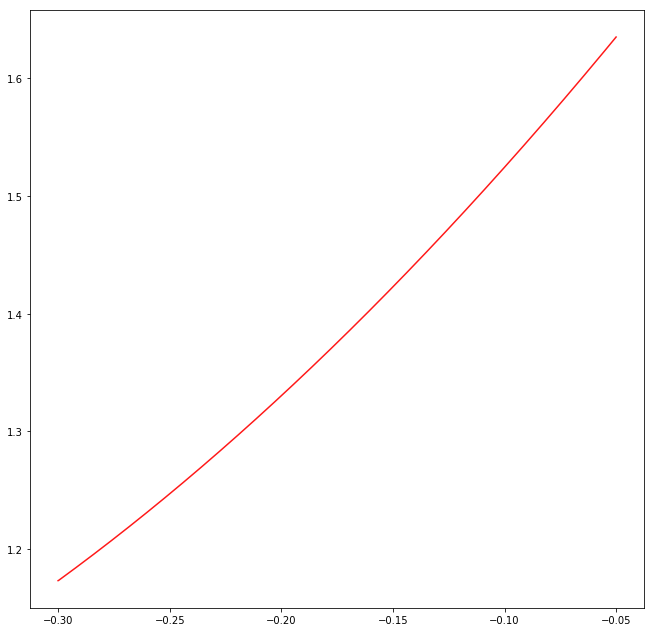

In [16]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.plot(b_listF,a_listF, '-', color='red', alpha = 0.9, markersize=3)

In [86]:
global n, my_a,b,my_x,my_y
b_sink3,a_sink3,tr3 = [],[],[]
x_sink3, y_sink3 = [],[]
n=3

for i in range(len(b_listF)):
    print(i/len(b_listF) * 100)
    b_i = b_listF[i]
    a_i = a_listF[i]
    x_i = x_listF[i]
    y_i = y_listF[i]
    
    b_sink3.append(b_i)
    a_sink3.append(a_i)
    x_sink3.append(x_i)
    y_sink3.append(y_i)
    
    
    b = b_i
    my_x,my_y = x_i,y_i
    tr3.append(get_tr(a_i))
    for j in range(100000):
        a_i += 0.001
        my_a = a_i
        xy = optimize.fsolve(F_R2,[my_x,my_y],xtol = 0)
        #check if converged to fixed point
        xy1 = NhMap_n(my_a,b,xy[0],xy[1],1,1)
        fixed = False
        if(sci.linalg.norm([xy1[0] - xy[0],xy1[1] - xy[1]]) < 0.0001): #if fixed point
            fixed = True
            print('fixed')
            break
            
        flag = False
        if not fixed: #check if period 3
            #print(xy)
            my_x,my_y = xy[0],xy[1]
            
            XYn1 = NhMap_n(my_a,b,my_x,my_y,n,2)
            vec_diff = F_R2(xy)
            #print(vec_diff)
            #print(get_tr(a_i))
            
            
            try: 
                if  sci.linalg.norm(vec_diff) < 0.0001:
                    flag = True
                    
                for k in range(1,n):
                    XYnk = NhMap_n(my_a,b,my_x,my_y,k,1)
                    vec_diff = [my_x - XYnk[0], my_y - XYnk[1]]
                    #print(sci.linalg.norm(vec_diff))
                    if sci.linalg.norm(vec_diff) < 0.0001:
                        flag = False
                if get_tr(a_i) > 1:
                    flag = False
                    break
            except ValueError:
                flag = False
        if flag:
            #print('yay')
            b_sink3.append(b_i)
            a_sink3.append(a_i)
            tr3.append(get_tr(a_i))
            x_sink3.append(my_x)
            y_sink3.append(my_y)
            
            
            
print('Done')         

0.0
0.020004000800160033
0.040008001600320066
0.060012002400480095
0.08001600320064013
0.10002000400080016
0.12002400480096019
0.14002800560112022
0.16003200640128026
0.18003600720144028
0.20004000800160032
0.22004400880176034
0.24004800960192038
0.26005201040208037
0.28005601120224044
0.30006001200240046
0.3200640128025605
0.34006801360272054
0.36007201440288056
0.3800760152030406
0.40008001600320064
0.4200840168033607
0.4400880176035207
0.4600920184036807
0.48009601920384076
0.5001000200040008
0.5201040208041607
0.5401080216043208
0.5601120224044809
0.580116023204641
0.6001200240048009
0.620124024804961
0.640128025605121
0.6601320264052811
0.6801360272054411
0.7001400280056012
0.7201440288057611
0.7401480296059212
0.7601520304060811
0.7801560312062412
0.8001600320064013
0.8201640328065612
0.8401680336067214
0.8601720344068814
0.8801760352070414
0.9001800360072014
0.9201840368073614
0.9401880376075216
0.9601920384076815
0.9801960392078415
1.0002000400080016
1.0202040408081616
1.040208

9.041808361672334
9.061812362472494
9.081816363272655
9.101820364072815
9.121824364872975
9.141828365673135
9.161832366473295
9.181836367273455
9.201840368073615
9.221844368873775
9.241848369673935
9.261852370474095
9.281856371274255
9.301860372074415
9.321864372874575
9.341868373674735
9.361872374474894
9.381876375275056
9.401880376075216
9.421884376875376
9.441888377675536
9.461892378475694
9.481896379275854
9.501900380076016
9.521904380876176
9.541908381676336
9.561912382476494
9.581916383276655
9.601920384076815
9.621924384876976
9.641928385677137
9.661932386477295
9.681936387277455
9.701940388077615
9.721944388877777
9.741948389677937
9.761952390478095
9.781956391278255
9.801960392078415
9.821964392878575
9.841968393678737
9.861972394478896
9.881976395279056
9.901980396079216
9.921984396879376
9.941988397679536
9.961992398479696
9.981996399279856
10.002000400080016
10.022004400880176
10.042008401680336
10.062012402480496
10.082016403280656
10.102020404080816
10.122024404880976
10.

18.00360072014403
18.02360472094419
18.04360872174435
18.06361272254451
18.08361672334467
18.10362072414483
18.12362472494499
18.14362872574515
18.16363272654531
18.18363672734547
18.20364072814563
18.22364472894579
18.24364872974595
18.26365273054611
18.28365673134627
18.30366073214643
18.32366473294659
18.34366873374675
18.36367273454691
18.38367673534707
18.40368073614723
18.42368473694739
18.44368873774755
18.46369273854771
18.48369673934787
18.50370074014803
18.52370474094819
18.54370874174835
18.56371274254851
18.58371674334867
18.60372074414883
18.623724744948987
18.64372874574915
18.66373274654931
18.68373674734947
18.70374074814963
18.723744748949787
18.74374874974995
18.76375275055011
18.78375675135027
18.80376075215043
18.823764752950588
18.84376875375075
18.86377275455091
18.88377675535107
18.90378075615123
18.923784756951388
18.943788757751552
18.96379275855171
18.983796759351872
19.003800760152032
19.02380476095219
19.043808761752352
19.06381276255251
19.083816763352672
1

27.125425085017003
27.145429085817163
27.165433086617323
27.185437087417487
27.20544108821764
27.225445089017803
27.245449089817964
27.265453090618124
27.285457091418287
27.30546109221844
27.325465093018604
27.345469093818764
27.365473094618924
27.385477095419088
27.40548109621924
27.425485097019404
27.445489097819564
27.465493098619724
27.485497099419888
27.50550110022004
27.525505101020205
27.545509101820365
27.565513102620525
27.58551710342068
27.60552110422084
27.625525105021005
27.645529105821165
27.665533106621325
27.68553710742148
27.70554110822164
27.725545109021805
27.745549109821965
27.765553110622125
27.785557111422282
27.805561112222442
27.825565113022606
27.845569113822766
27.865573114622926
27.885577115423082
27.905581116223242
27.925585117023406
27.945589117823566
27.965593118623726
27.985597119423883
28.005601120224043
28.025605121024206
28.045609121824366
28.065613122624526
28.085617123424683
28.105621124224843
28.125625125025007
28.145629125825167
28.165633126625323
2

36.2872574514903
36.307261452290454
36.32726545309062
36.34726945389078
36.36727345469094
36.387277455491095
36.40728145629126
36.427285457091415
36.44728945789158
36.46729345869174
36.4872974594919
36.507301460292055
36.52730546109222
36.54730946189238
36.56731346269254
36.587317463492695
36.60732146429286
36.62732546509302
36.64732946589318
36.667333466693336
36.6873374674935
36.707341468293656
36.72734546909382
36.74734946989398
36.76735347069414
36.787357471494296
36.80736147229446
36.827365473094616
36.84736947389478
36.867373474694936
36.8873774754951
36.90738147629526
36.92738547709542
36.947389477895584
36.96739347869574
36.9873974794959
37.00740148029606
37.027405481096224
37.04740948189638
37.06741348269654
37.0874174834967
37.10742148429686
37.12742548509702
37.147429485897185
37.16743348669734
37.1874374874975
37.20744148829766
37.22744548909782
37.247449489897974
37.26745349069814
37.2874574914983
37.30746149229846
37.32746549309862
37.34746949389878
37.36747349469894
37.3

45.34906981396279
45.36907381476295
45.38907781556311
45.40908181636327
45.42908581716343
45.449089817963596
45.46909381876375
45.48909781956391
45.50910182036407
45.52910582116424
45.54910982196439
45.56911382276455
45.58911782356471
45.60912182436488
45.62912582516503
45.6491298259652
45.66913382676535
45.68913782756551
45.709141828365674
45.72914582916584
45.749149829965994
45.76915383076615
45.789157831566314
45.80916183236647
45.829165833166634
45.84916983396679
45.869173834766954
45.88917783556711
45.909181836367274
45.92918583716744
45.949189837967594
45.96919383876775
45.989197839567915
46.00920184036808
46.029205841168235
46.04920984196839
46.069213842768555
46.08921784356871
46.109221844368875
46.12922584516904
46.149229845969195
46.16923384676935
46.189237847569515
46.20924184836967
46.229245849169835
46.24924984996999
46.269253850770156
46.28925785157031
46.309261852370476
46.32926585317063
46.349269853970796
46.36927385477095
46.389277855571116
46.40928185637128
46.4292858

54.61092218443688
54.63092618523705
54.65093018603721
54.67093418683737
54.69093818763753
54.710942188437684
54.73094618923785
54.750950190038004
54.770954190838175
54.790958191638325
54.81096219243848
54.83096619323865
54.85097019403881
54.87097419483897
54.89097819563913
54.910982196439285
54.93098619723945
54.950990198039605
54.970994198839776
54.99099819963993
55.01100220044008
55.03100620124025
55.05101020204041
55.07101420284057
55.09101820364073
55.111022204440886
55.13102620524105
55.151030206041206
55.17103420684136
55.191038207641526
55.21104220844168
55.23104620924185
55.25105021004201
55.271054210842166
55.29105821164233
55.311062212442486
55.33106621324265
55.35107021404281
55.37107421484296
55.391078215643134
55.41108221644328
55.431086217243454
55.45109021804361
55.47109421884377
55.49109821964393
55.51110222044409
55.53110622124425
55.55111022204441
55.571114222844564
55.59111822364473
55.611122224444884
55.631126225245055
55.65113022604521
55.67113422684537
55.69113822

63.75275055011003
63.77275455091018
63.792758551710335
63.812762552510506
63.83276655331066
63.852770554110826
63.87277455491098
63.89277855571114
63.9127825565113
63.93278655731146
63.95279055811163
63.97279455891179
63.992798559711936
64.0128025605121
64.03280656131226
64.05281056211243
64.07281456291258
64.09281856371274
64.11282256451291
64.13282656531307
64.15283056611322
64.17283456691338
64.19283856771354
64.21284256851371
64.23284656931386
64.25285057011402
64.27285457091418
64.29285857171433
64.3128625725145
64.33286657331466
64.35287057411482
64.37287457491499
64.39287857571514
64.4128825765153
64.43288657731546
64.45289057811561
64.47289457891578
64.49289857971594
64.51290258051611
64.53290658131627
64.55291058211643
64.57291458291658
64.59291858371674
64.61292258451691
64.63292658531707
64.65293058611722
64.67293458691739
64.69293858771753
64.7129425885177
64.73294658931786
64.75295059011802
64.77295459091819
64.79295859171835
64.8129625925185
64.83296659331866
64.852970594

73.11462292458492
73.13462692538508
73.15463092618523
73.17463492698539
73.19463892778556
73.21464292858572
73.23464692938589
73.25465093018605
73.27465493098619
73.29465893178636
73.31466293258651
73.33466693338667
73.35467093418684
73.374674934987
73.39467893578716
73.41468293658731
73.43468693738747
73.45469093818764
73.4746949389878
73.49469893978797
73.51470294058812
73.53470694138828
73.55471094218844
73.57471494298859
73.59471894378876
73.61472294458892
73.63472694538908
73.65473094618923
73.67473494698939
73.69473894778956
73.71474294858972
73.73474694938987
73.75475095019004
73.7747549509902
73.79475895179036
73.81476295259051
73.83476695339067
73.85477095419084
73.874774954991
73.89477895579117
73.91478295659132
73.93478695739148
73.95479095819164
73.9747949589918
73.99479895979196
74.01480296059212
74.03480696139228
74.05481096219245
74.07481496299259
74.09481896379276
74.11482296459292
74.13482696539307
74.15483096619324
74.1748349669934
74.19483896779356
74.21484296859371


82.47649529905982
82.49649929985998
82.51650330066013
82.53650730146029
82.55651130226045
82.57651530306062
82.59651930386077
82.61652330466093
82.6365273054611
82.65653130626124
82.67653530706141
82.69653930786157
82.71654330866173
82.7365473094619
82.75655131026205
82.77655531106221
82.79655931186237
82.81656331266252
82.8365673134627
82.85657131426285
82.87657531506302
82.89657931586318
82.91658331666333
82.93658731746349
82.95659131826365
82.97659531906382
82.99659931986398
83.01660332066413
83.03660732146429
83.05661132226444
83.07661532306462
83.09661932386477
83.11662332466493
83.1366273254651
83.15663132626526
83.17663532706541
83.19663932786557
83.21664332866573
83.2366473294659
83.25665133026605
83.27665533106622
83.29665933186638
83.31666333266654
83.33666733346669
83.35667133426685
83.37667533506702
83.39667933586718
83.41668333666733
83.4366873374675
83.45669133826765
83.47669533906782
83.49669933986797
83.51670334066813
83.5367073414683
83.55671134226846
83.57671534306861

91.85837167433488
91.87837567513503
91.89837967593519
91.91838367673535
91.9383876775355
91.95839167833567
91.97839567913583
91.99839967993599
92.01840368073616
92.0384076815363
92.05841168233647
92.07841568313663
92.09841968393678
92.11842368473695
92.13842768553711
92.15843168633727
92.17843568713742
92.19843968793758
92.21844368873775
92.2384476895379
92.25845169033808
92.27845569113823
92.29845969193839
92.31846369273855
92.3384676935387
92.35847169433887
92.37847569513903
92.39847969593919
92.41848369673934
92.4384876975395
92.45849169833967
92.47849569913983
92.49849969993998
92.51850370074015
92.53850770154031
92.55851170234047
92.57851570314062
92.59851970394078
92.61852370474095
92.63852770554111
92.65853170634126
92.67853570714144
92.69853970794159
92.71854370874175
92.7385477095419
92.75855171034206
92.77855571114223
92.79855971194239
92.81856371274256
92.8385677135427
92.85857171434286
92.87857571514303
92.89857971594319
92.91858371674336
92.93858771754351
92.95859171834367

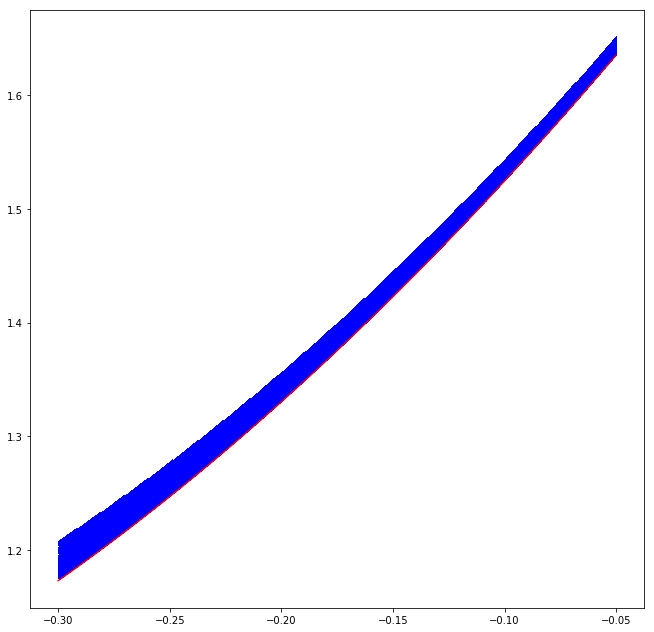

In [87]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.plot(b_sink3,a_sink3,',',color='blue')
plt.plot(b_listF,a_listF, '-', color='red', alpha = 0.9, markersize=3)

Text(0, 0.5, 'Trace')

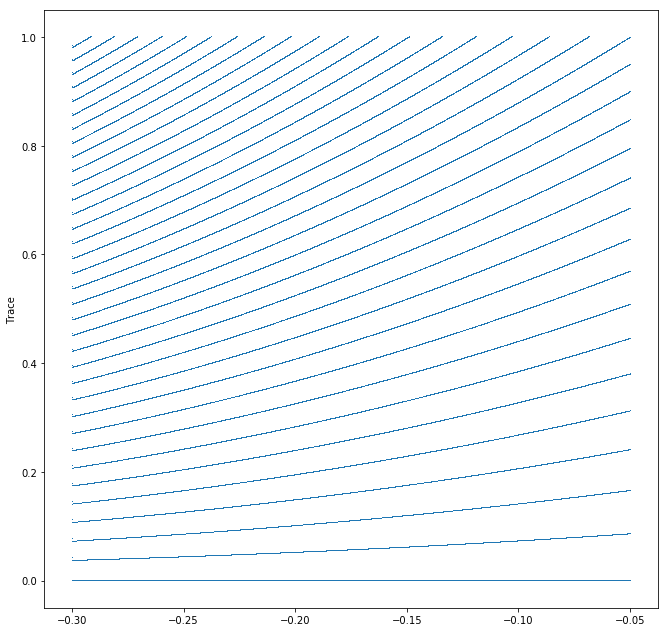

In [88]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.plot(b_sink3,tr3,',')
plt.ylabel('Trace')

Text(0, 0.5, 'Y')

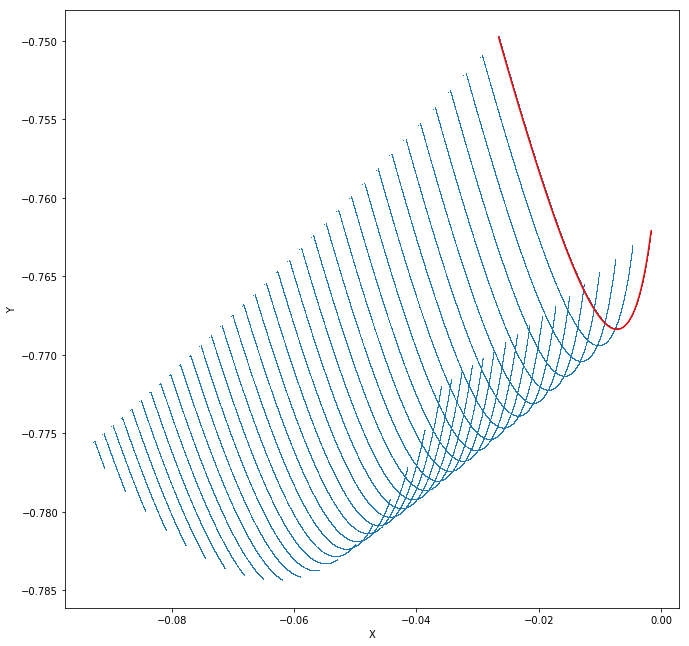

In [89]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1)

plt.plot(x_sink3, y_sink3,',')
plt.plot(x_listF,y_listF,color='red')
plt.xlabel('X')
plt.ylabel('Y')


In [91]:
#Downwards!
global n, my_a,b,my_x,my_y
b_sink3D,a_sink3D,tr3D = [],[],[]
x_sink3D, y_sink3D = [],[]
n=3

for i in range(len(b_listF)):
    print(i/len(b_listF) * 100)
    b_i = b_listF[i]
    a_i = a_listF[i]
    x_i = x_listF[i]
    y_i = y_listF[i]
    
    b_sink3D.append(b_i)
    a_sink3D.append(a_i)
    x_sink3D.append(x_i)
    y_sink3D.append(y_i)
    
    
    b = b_i
    my_x,my_y = x_i,y_i
    tr3D.append(get_tr(a_i))
    for j in range(10000):
        a_i += -0.0005
        my_a = a_i
        xy = optimize.fsolve(F_R2,[my_x,my_y],xtol = 0)
        #check if converged to fixed point
        xy1 = NhMap_n(my_a,b,xy[0],xy[1],1,1)
        fixed = False
        if(sci.linalg.norm([xy1[0] - xy[0],xy1[1] - xy[1]]) < 0.0001): #if fixed point
            fixed = True
            print('fixed')
            break
            
        flag = False
        if not fixed: #check if period 3
            #print(xy)
            my_x,my_y = xy[0],xy[1]
            
            XYn1 = NhMap_n(my_a,b,my_x,my_y,n,2)
            vec_diff = F_R2(xy)
            #print(vec_diff)
            #print(get_tr(a_i))
            
            
            try: 
                if  sci.linalg.norm(vec_diff) < 0.0001:
                    flag = True
                    
                for k in range(1,n):
                    XYnk = NhMap_n(my_a,b,my_x,my_y,k,1)
                    vec_diff = [my_x - XYnk[0], my_y - XYnk[1]]
                    #print(sci.linalg.norm(vec_diff))
                    if sci.linalg.norm(vec_diff) < 0.0001:
                        flag = False
                if get_tr(a_i) > 1:
                    flag = False
                    break
            except ValueError:
                flag = False
        if flag:
            #print('yay')
            b_sink3D.append(b_i)
            a_sink3D.append(a_i)
            tr3D.append(get_tr(a_i))
            x_sink3D.append(my_x)
            y_sink3D.append(my_y)
            
            
            
print('Done')       

0.0
0.020004000800160033
0.040008001600320066
0.060012002400480095
0.08001600320064013
0.10002000400080016
0.12002400480096019
0.14002800560112022
0.16003200640128026
0.18003600720144028
0.20004000800160032
0.22004400880176034
0.24004800960192038
0.26005201040208037
0.28005601120224044
0.30006001200240046
0.3200640128025605
0.34006801360272054
0.36007201440288056
0.3800760152030406
0.40008001600320064
0.4200840168033607
0.4400880176035207
0.4600920184036807
0.48009601920384076
0.5001000200040008
0.5201040208041607
0.5401080216043208
0.5601120224044809
0.580116023204641
0.6001200240048009
0.620124024804961
0.640128025605121
0.6601320264052811
0.6801360272054411
0.7001400280056012
0.7201440288057611
0.7401480296059212
0.7601520304060811
0.7801560312062412
0.8001600320064013
0.8201640328065612
0.8401680336067214
0.8601720344068814
0.8801760352070414
0.9001800360072014
0.9201840368073614
0.9401880376075216
0.9601920384076815
0.9801960392078415


/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


1.0002000400080016
1.0202040408081616
1.0402080416083215
1.0602120424084818
1.0802160432086416
1.100220044008802
1.1202240448089618
1.1402280456091218
1.160232046409282
1.180236047209442
1.2002400480096018
1.220244048809762
1.240248049609922
1.260252050410082
1.280256051210242
1.300260052010402
1.3202640528105622
1.340268053610722
1.3602720544108822
1.3802760552110422
1.4002800560112023
1.4202840568113624
1.4402880576115222
1.4602920584116823
1.4802960592118424
1.5003000600120024
1.5203040608121623
1.5403080616123226
1.5603120624124824
1.5803160632126425
1.6003200640128026
1.6203240648129626
1.6403280656131225
1.6603320664132826
1.6803360672134429
1.7003400680136025
1.7203440688137628
1.7403480696139229
1.7603520704140827
1.7803560712142428
1.8003600720144028
1.8203640728145631
1.8403680736147228
1.860372074414883
1.8803760752150431
1.900380076015203
1.920384076815363
1.9403880776155231
1.960392078415683
1.980396079215843
2.000400080016003
2.020404080816163
2.0404080816163233
2.0604120

10.182036407281455
10.202040408081617
10.222044408881777
10.242048409681937
10.262052410482097
10.282056411282255
10.302060412082415
10.322064412882577
10.342068413682737
10.362072414482897
10.382076415283056
10.402080416083216
10.422084416883378
10.442088417683538
10.462092418483698
10.482096419283856
10.502100420084016
10.522104420884176
10.542108421684338
10.562112422484498
10.582116423284656
10.602120424084816
10.622124424884976
10.642128425685137
10.662132426485298
10.682136427285457
10.702140428085617
10.722144428885777
10.742148429685937
10.762152430486097
10.782156431286257
10.802160432086417
10.822164432886577
10.842168433686737
10.862172434486897
10.882176435287057
10.902180436087217
10.922184436887378
10.942188437687538
10.962192438487698
10.982196439287858
11.002200440088018
11.022204440888178
11.042208441688338
11.062212442488498
11.082216443288658
11.102220444088818
11.122224444888978
11.142228445689138
11.162232446489298
11.182236447289458
11.202240448089618
11.222244448

18.943788757751552
18.96379275855171
18.983796759351872
19.003800760152032
19.02380476095219
19.043808761752352
19.06381276255251
19.083816763352672
19.103820764152832
19.12382476495299
19.143828765753153
19.16383276655331
19.183836767353473
19.20384076815363
19.22384476895379
19.243848769753953
19.26385277055411
19.283856771354273
19.30386077215443
19.32386477295459
19.343868773754753
19.36387277455491
19.383876775355073
19.40388077615523
19.42388477695539
19.443888777755554
19.46389277855571
19.483896779355874
19.50390078015603
19.52390478095619
19.54390878175635
19.56391278255651
19.583916783356674
19.60392078415683
19.62392478495699
19.64392878575715
19.66393278655731
19.683936787357474
19.70394078815763
19.72394478895779
19.74394878975795
19.76395279055811
19.78395679135827
19.80396079215843
19.82396479295859
19.84396879375875
19.86397279455891
19.88397679535907
19.90398079615923
19.92398479695939
19.943988797759552
19.963992798559712
19.983996799359872
20.004000800160032
20.02400

27.885577115423082
27.905581116223242
27.925585117023406
27.945589117823566
27.965593118623726
27.985597119423883
28.005601120224043
28.025605121024206
28.045609121824366
28.065613122624526
28.085617123424683
28.105621124224843
28.125625125025007
28.145629125825167
28.165633126625323
28.185637127425483
28.205641128225643
28.225645129025807
28.245649129825967
28.265653130626124
28.285657131426284
28.305661132226444
28.325665133026607
28.345669133826767
28.365673134626924
28.385677135427084
28.405681136227244
28.425685137027408
28.445689137827568
28.465693138627724
28.485697139427884
28.505701140228044
28.525705141028208
28.545709141828368
28.565713142628525
28.585717143428685
28.605721144228845
28.62572514502901
28.64572914582917
28.665733146629325
28.685737147429485
28.705741148229645
28.72574514902981
28.74574914982996
28.765753150630125
28.785757151430285
28.805761152230446
28.82576515303061
28.845769153830762
28.865773154630926
28.885777155431086
28.905781156231246
28.92578515703141

36.827365473094616
36.84736947389478
36.867373474694936
36.8873774754951
36.90738147629526
36.92738547709542
36.947389477895584
36.96739347869574
36.9873974794959
37.00740148029606
37.027405481096224
37.04740948189638
37.06741348269654
37.0874174834967
37.10742148429686
37.12742548509702
37.147429485897185
37.16743348669734
37.1874374874975
37.20744148829766
37.22744548909782
37.247449489897974
37.26745349069814
37.2874574914983
37.30746149229846
37.32746549309862
37.34746949389878
37.36747349469894
37.3874774954991
37.40748149629926
37.427485497099426
37.447489497899575
37.46749349869974
37.4874974994999
37.50750150030006
37.52750550110022
37.54750950190038
37.56751350270054
37.5875175035007
37.60752150430086
37.62752550510102
37.647529505901176
37.66753350670134
37.6875375075015
37.70754150830166
37.72754550910182
37.74754950990198
37.76755351070214
37.7875575115023
37.80756151230246
37.82756551310262
37.847569513902776
37.86757351470294
37.887577515503104
37.90758151630326
37.927585

46.189237847569515
46.20924184836967
46.229245849169835
46.24924984996999
46.269253850770156
46.28925785157031
46.309261852370476
46.32926585317063
46.349269853970796
46.36927385477095
46.389277855571116
46.40928185637128
46.42928585717143
46.44928985797159
46.469293858771756
46.48929785957191
46.50930186037208
46.52930586117223
46.5493098619724
46.56931386277255
46.58931786357272
46.60932186437287
46.62932586517303
46.64932986597319
46.66933386677336
46.689337867573514
46.70934186837368
46.729345869173834
46.749349869974
46.769353870774154
46.78935787157432
46.80936187237448
46.82936587317463
46.849369873974794
46.86937387477496
46.889377875575114
46.90938187637527
46.929385877175434
46.9493898779756
46.969393878775755
46.98939787957592
47.009401880376075
47.02940588117623
47.049409881976395
47.06941388277656
47.089417883576715
47.10942188437687
47.129425885177035
47.1494298859772
47.169433886777355
47.18943788757752
47.209441888377675
47.22944588917783
47.249449889977996
47.269453890

55.69113822764553
55.71114222844569
55.73114622924585
55.75115023004601
55.771154230846165
55.791158231646335
55.811162232446485
55.831166233246655
55.85117023404681
55.87117423484697
55.89117823564713
55.91118223644729
55.93118623724745
55.95119023804761
55.971194238847765
55.99119823964793
56.011202240448085
56.031206241248256
56.05121024204841
56.07121424284857
56.09121824364873
56.11122224444889
56.13122624524905
56.15123024604921
56.171234246849366
56.19123824764954
56.211242248449686
56.23124624924986
56.25125025005001
56.27125425085017
56.29125825165033
56.31126225245049
56.33126625325065
56.35127025405081
56.37127425485097
56.39127825565113
56.41128225645129
56.43128625725144
56.451290258051614
56.47129425885177
56.491298259651934
56.51130226045209
56.53130626125225
56.55131026205241
56.57131426285257
56.59131826365274
56.61132226445289
56.631326265253044
56.651330266053215
56.67133426685337
56.691338267653535
56.71134226845369
56.73134626925385
56.75135027005401
56.77135427085

65.4130826165233
65.43308661732347
65.45309061812362
65.4730946189238
65.49309861972394
65.5131026205241
65.53310662132427
65.55311062212442
65.57311462292459
65.59311862372475
65.6131226245249
65.63312662532506
65.65313062612522
65.67313462692539
65.69313862772555
65.7131426285257
65.73314662932587
65.75315063012603
65.77315463092619
65.79315863172634
65.8131626325265
65.83316663332667
65.85317063412683
65.87317463492698
65.89317863572714
65.9131826365273
65.93318663732747
65.95319063812762
65.9731946389278
65.99319863972795
66.0132026405281
66.03320664132826
66.05321064212842
66.07321464292859
66.09321864372875
66.1132226445289
66.13322664532907
66.15323064612923
66.17323464692939
66.19323864772954
66.2132426485297
66.23324664932987
66.25325065013003
66.2732546509302
66.29325865173034
66.3132626525305
66.33326665333067
66.35327065413082
66.373274654931
66.39327865573115
66.41328265653131
66.43328665733146
66.45329065813162
66.47329465893179
66.49329865973195
66.5133026605321
66.53330

75.23504700940188
75.25505101020204
75.2750550110022
75.29505901180235
75.31506301260252
75.33506701340268
75.35507101420285
75.375075015003
75.39507901580316
75.41508301660332
75.43508701740348
75.45509101820365
75.4750950190038
75.49509901980396
75.51510302060413
75.53510702140429
75.55511102220444
75.5751150230046
75.59511902380476
75.61512302460493
75.63512702540508
75.65513102620524
75.6751350270054
75.69513902780555
75.71514302860572
75.73514702940588
75.75515103020604
75.77515503100621
75.79515903180636
75.81516303260652
75.83516703340668
75.85517103420683
75.875175035007
75.89517903580716
75.91518303660733
75.93518703740749
75.95519103820763
75.9751950390078
75.99519903980796
76.01520304060813
76.03520704140828
76.05521104220844
76.0752150430086
76.09521904380875
76.11522304460892
76.13522704540908
76.15523104620924
76.17523504700941
76.19523904780957
76.21524304860972
76.23524704940988
76.25525105021003
76.2752550510102
76.29525905181036
76.31526305261053
76.33526705341069
76.

84.45689137827566
84.47689537907581
84.49689937987598
84.51690338067614
84.5369073814763
84.55691138227645
84.57691538307661
84.59691938387678
84.61692338467694
84.6369273854771
84.65693138627725
84.6769353870774
84.69693938787758
84.71694338867773
84.73694738947789
84.75695139027806
84.77695539107822
84.79695939187837
84.81696339267853
84.83696739347869
84.85697139427886
84.87697539507901
84.89697939587919
84.91698339667934
84.93698739747948
84.95699139827965
84.97699539907981
84.99699939987998
85.01700340068014
85.0370074014803
85.05701140228045
85.07701540308061
85.09701940388078
85.11702340468094
85.13702740548109
85.15703140628126
85.17703540708142
85.19703940788158
85.21704340868173
85.23704740948189
85.25705141028206
85.27705541108222
85.29705941188239
85.31706341268254
85.33706741348269
85.35707141428286
85.37707541508301
85.39707941588318
85.41708341668334
85.4370874174835
85.45709141828365
85.47709541908381
85.49709941988398
85.51710342068414
85.5371074214843
85.5571114222844

93.69873974794959
93.71874374874976
93.73874774954992
93.75875175035007
93.77875575115023
93.79875975195039
93.81876375275054
93.83876775355071
93.85877175435087
93.87877575515104
93.8987797559512
93.91878375675134
93.93878775755151
93.95879175835167
93.97879575915184
93.99879975995199
94.01880376075215
94.0388077615523
94.05881176235246
94.07881576315263
94.09881976395279
94.11882376475295
94.13882776555312
94.15883176635327
94.17883576715343
94.19883976795359
94.21884376875374
94.23884776955391
94.25885177035407
94.27885577115424
94.2988597719544
94.31886377275454
94.33886777355471
94.35887177435487
94.37887577515504
94.3988797759552
94.41888377675535
94.43888777755551
94.45889177835566
94.47889577915583
94.49889977995599
94.51890378075615
94.53890778155632
94.55891178235647
94.57891578315663
94.59891978395679
94.61892378475694
fixed
94.63892778555712
94.65893178635727
94.67893578715744
94.6989397879576
94.71894378875774
94.73894778955791
94.75895179035807
94.77895579115824
94.798959

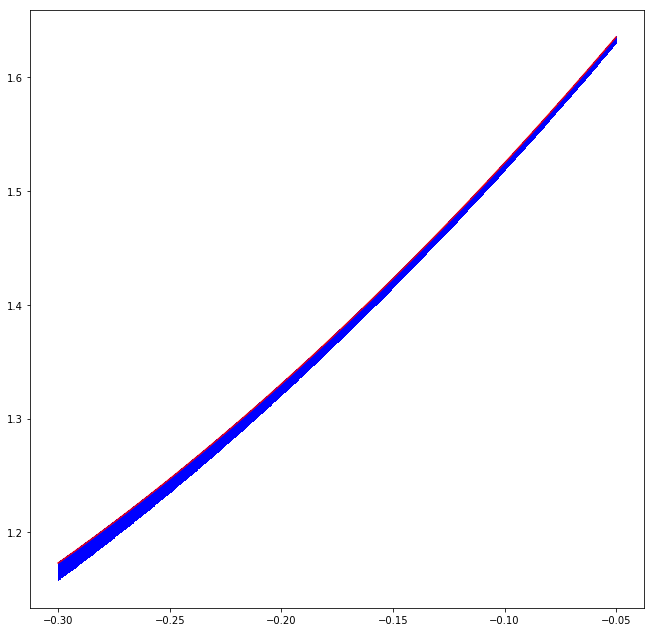

In [92]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.plot(b_sink3D,a_sink3D,',',color='blue')
plt.plot(b_listF,a_listF, '-', color='red', alpha = 0.9, markersize=3)

Text(0, 0.5, 'Trace')

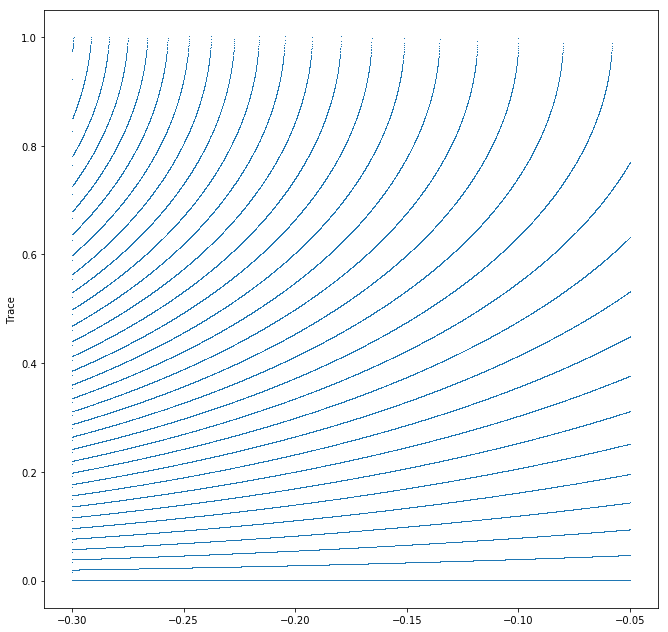

In [93]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.plot(b_sink3D,tr3D,',')
plt.ylabel('Trace')

Text(0, 0.5, 'Y')

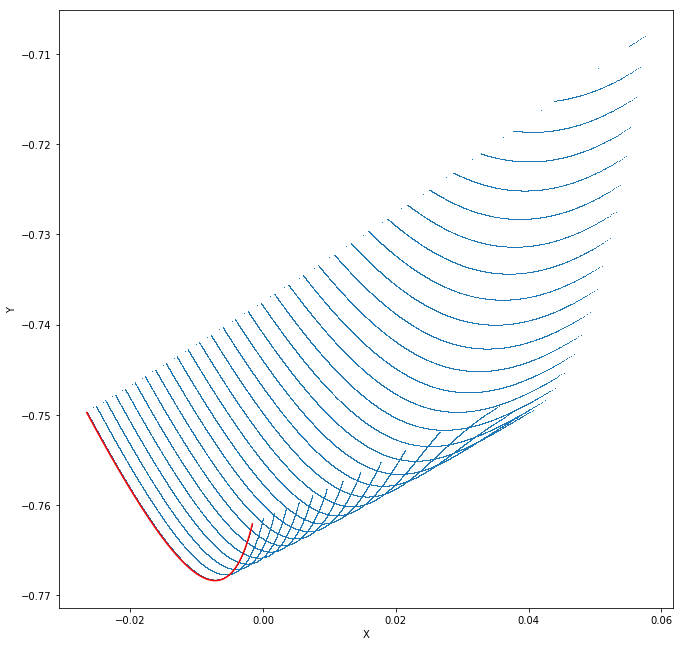

In [94]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1)

plt.plot(x_sink3D, y_sink3D,',')
plt.plot(x_listF,y_listF,color='red')
plt.xlabel('X')
plt.ylabel('Y')

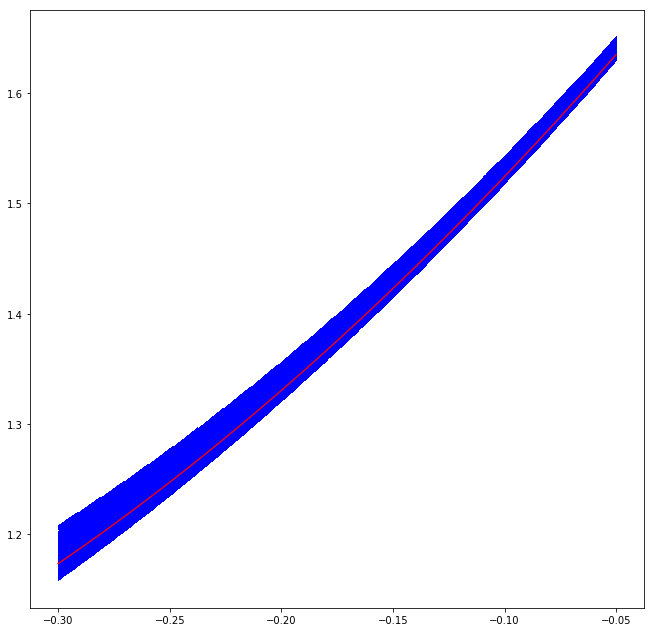

In [95]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.plot(b_sink3D,a_sink3D,',',color='blue')
plt.plot(b_sink3,a_sink3,',',color='blue')
plt.plot(b_listF,a_listF, '-', color='red', alpha = 0.9, markersize=3)

Text(0, 0.5, 'Trace ')

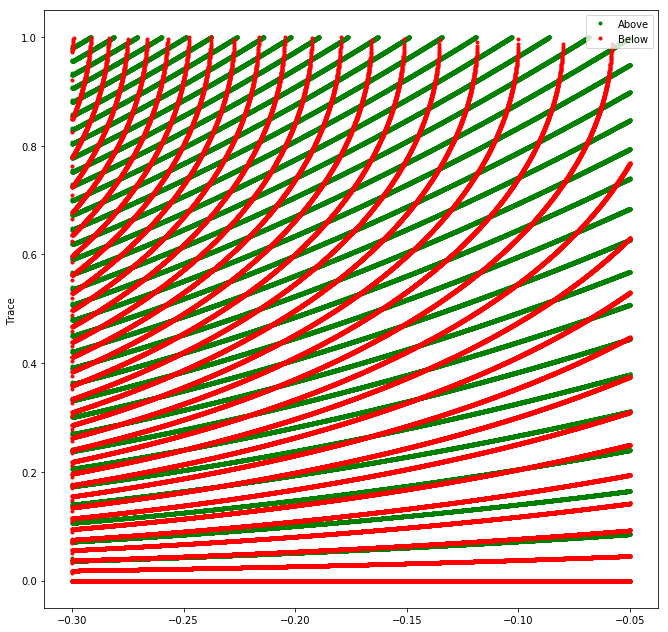

In [100]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.plot(b_sink3,tr3,'.',color='green')
plt.plot(b_sink3D,tr3D,'.',color = 'red')
plt.legend(['Above','Below'])
plt.ylabel('Trace ')

Text(0, 0.5, 'Y')

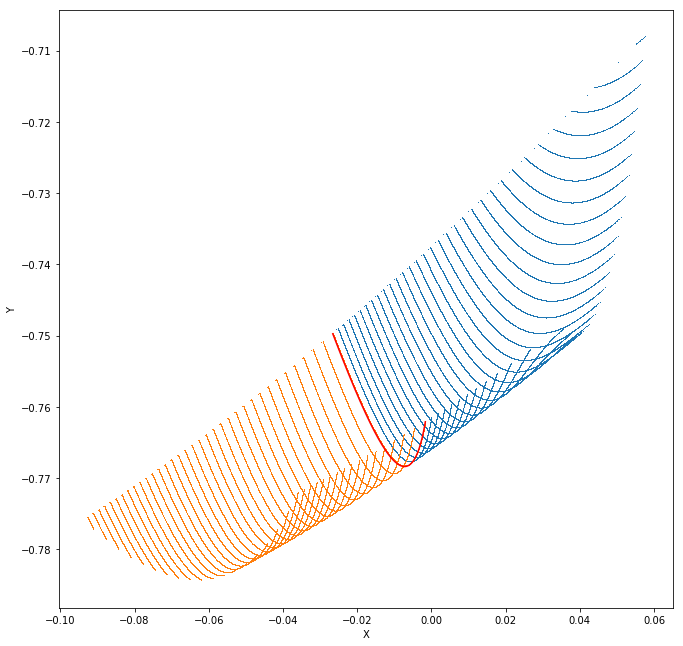

In [101]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1)

plt.plot(x_sink3D, y_sink3D,',')
plt.plot(x_sink3, y_sink3,',')
plt.plot(x_listF,y_listF,color='red')
plt.xlabel('X')
plt.ylabel('Y')

In [102]:
# insert a,b,x,y of period3 supersink
dens_tan=12001
ba_list = np.loadtxt("new_sink_ba.txt").reshape(dens_tan, 2)
b_listB,a_listB = np.zeros(dens_tan),np.zeros(dens_tan)
for i in range(dens_tan):
    b_listB[i] = ba_list[i][0]
    a_listB[i] = ba_list[i][1]
xy_list = np.loadtxt("new_sink_xy.txt").reshape(dens_tan, 2)
x_listB,y_listB = np.zeros(dens_tan),np.zeros(dens_tan)
for i in range(dens_tan):
    x_listB[i] = xy_list[i][0]
    y_listB[i] = xy_list[i][1]





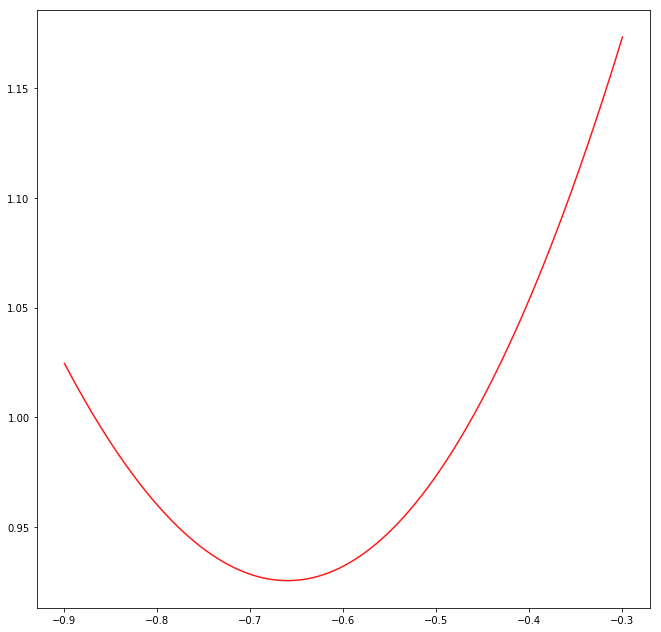

In [103]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.plot(b_listB,a_listB, '-', color='red', alpha = 0.9, markersize=3)

In [104]:
global n, my_a,b,my_x,my_y
b_sink3BU,a_sink3BU,tr3BU = [],[],[]
x_sink3BU, y_sink3BU = [],[]
n=3

for i in range(len(b_listB)):
    print(i/len(b_listB) * 100)
    b_i = b_listB[i]
    a_i = a_listB[i]
    x_i = x_listB[i]
    y_i = y_listB[i]
    
    b_sink3BU.append(b_i)
    a_sink3BU.append(a_i)
    x_sink3BU.append(x_i)
    y_sink3BU.append(y_i)
    
    
    b = b_i
    my_x,my_y = x_i,y_i
    tr3BU.append(get_tr(a_i))
    for j in range(100000):
        a_i += 0.001
        my_a = a_i
        xy = optimize.fsolve(F_R2,[my_x,my_y],xtol = 0)
        #check if converged to fixed point
        xy1 = NhMap_n(my_a,b,xy[0],xy[1],1,1)
        fixed = False
        if(sci.linalg.norm([xy1[0] - xy[0],xy1[1] - xy[1]]) < 0.0001): #if fixed point
            fixed = True
            print('fixed')
            break
            
        flag = False
        if not fixed: #check if period 3
            #print(xy)
            my_x,my_y = xy[0],xy[1]
            
            XYn1 = NhMap_n(my_a,b,my_x,my_y,n,2)
            vec_diff = F_R2(xy)
            #print(vec_diff)
            #print(get_tr(a_i))
            
            
            try: 
                if  sci.linalg.norm(vec_diff) < 0.0001:
                    flag = True
                    
                for k in range(1,n):
                    XYnk = NhMap_n(my_a,b,my_x,my_y,k,1)
                    vec_diff = [my_x - XYnk[0], my_y - XYnk[1]]
                    #print(sci.linalg.norm(vec_diff))
                    if sci.linalg.norm(vec_diff) < 0.0001:
                        flag = False
                if get_tr(a_i) > 1:
                    flag = False
                    break
            except ValueError:
                flag = False
        if flag:
            #print('yay')
            b_sink3BU.append(b_i)
            a_sink3BU.append(a_i)
            tr3BU.append(get_tr(a_i))
            x_sink3BU.append(my_x)
            y_sink3BU.append(my_y)
            
            
            
print('Done')       

0.0
0.020004000800160033
0.040008001600320066
0.060012002400480095
0.08001600320064013
0.10002000400080016
0.12002400480096019
0.14002800560112022
0.16003200640128026
0.18003600720144028
0.20004000800160032
0.22004400880176034
0.24004800960192038
0.26005201040208037
0.28005601120224044
0.30006001200240046
0.3200640128025605
0.34006801360272054
0.36007201440288056
0.3800760152030406
0.40008001600320064
0.4200840168033607
0.4400880176035207
0.4600920184036807
0.48009601920384076
0.5001000200040008
0.5201040208041607
0.5401080216043208
0.5601120224044809
0.580116023204641
0.6001200240048009
0.620124024804961
0.640128025605121
0.6601320264052811
0.6801360272054411
0.7001400280056012
0.7201440288057611
0.7401480296059212
0.7601520304060811
0.7801560312062412
0.8001600320064013
0.8201640328065612
0.8401680336067214
0.8601720344068814
0.8801760352070414
0.9001800360072014
0.9201840368073614
0.9401880376075216
0.9601920384076815
0.9801960392078415
1.0002000400080016
1.0202040408081616
1.040208

9.081816363272655
9.101820364072815
9.121824364872975
9.141828365673135
9.161832366473295
9.181836367273455
9.201840368073615
9.221844368873775
9.241848369673935
9.261852370474095
9.281856371274255
9.301860372074415
9.321864372874575
9.341868373674735
9.361872374474894
9.381876375275056
9.401880376075216
9.421884376875376
9.441888377675536
9.461892378475694
9.481896379275854
9.501900380076016
9.521904380876176
9.541908381676336
9.561912382476494
9.581916383276655
9.601920384076815
9.621924384876976
9.641928385677137
9.661932386477295
9.681936387277455
9.701940388077615
9.721944388877777
9.741948389677937
9.761952390478095
9.781956391278255
9.801960392078415
9.821964392878575
9.841968393678737
9.861972394478896
9.881976395279056
9.901980396079216
9.921984396879376
9.941988397679536
9.961992398479696
9.981996399279856
10.002000400080016
10.022004400880176
10.042008401680336
10.062012402480496
10.082016403280656
10.102020404080816
10.122024404880976
10.142028405681137
10.162032406481297
1

17.843568713742748
17.863572714542908
17.883576715343068
17.903580716143228
17.923584716943388
17.94358871774355
17.96359271854371
17.98359671934387
18.00360072014403
18.02360472094419
18.04360872174435
18.06361272254451
18.08361672334467
18.10362072414483
18.12362472494499
18.14362872574515
18.16363272654531
18.18363672734547
18.20364072814563
18.22364472894579
18.24364872974595
18.26365273054611
18.28365673134627
18.30366073214643
18.32366473294659
18.34366873374675
18.36367273454691
18.38367673534707
18.40368073614723
18.42368473694739
18.44368873774755
18.46369273854771
18.48369673934787
18.50370074014803
18.52370474094819
18.54370874174835
18.56371274254851
18.58371674334867
18.60372074414883
18.623724744948987
18.64372874574915
18.66373274654931
18.68373674734947
18.70374074814963
18.723744748949787
18.74374874974995
18.76375275055011
18.78375675135027
18.80376075215043
18.823764752950588
18.84376875375075
18.86377275455091
18.88377675535107
18.90378075615123
18.923784756951388
1

26.705341068213645
26.7253450690138
26.74534906981396
26.765353070614122
26.785357071414285
26.805361072214446
26.825365073014602
26.845369073814762
26.865373074614922
26.885377075415086
26.905381076215246
26.925385077015402
26.945389077815562
26.965393078615723
26.985397079415886
27.00540108021604
27.025405081016203
27.045409081816363
27.065413082616523
27.085417083416687
27.10542108421684
27.125425085017003
27.145429085817163
27.165433086617323
27.185437087417487
27.20544108821764
27.225445089017803
27.245449089817964
27.265453090618124
27.285457091418287
27.30546109221844
27.325465093018604
27.345469093818764
27.365473094618924
27.385477095419088
27.40548109621924
27.425485097019404
27.445489097819564
27.465493098619724
27.485497099419888
27.50550110022004
27.525505101020205
27.545509101820365
27.565513102620525
27.58551710342068
27.60552110422084
27.625525105021005
27.645529105821165
27.665533106621325
27.68553710742148
27.70554110822164
27.725545109021805
27.745549109821965
27.765

35.767153430686136
35.7871574314863
35.807161432286456
35.82716543308662
35.847169433886776
35.86717343468694
35.8871774354871
35.90718143628725
35.92718543708742
35.94718943788758
35.96719343868774
35.9871974394879
36.00720144028806
36.02720544108821
36.04720944188838
36.06721344268854
36.0872174434887
36.107221444288854
36.12722544508902
36.14722944588918
36.16723344668934
36.187237447489494
36.20724144828966
36.22724544908982
36.24724944988998
36.26725345069014
36.2872574514903
36.307261452290454
36.32726545309062
36.34726945389078
36.36727345469094
36.387277455491095
36.40728145629126
36.427285457091415
36.44728945789158
36.46729345869174
36.4872974594919
36.507301460292055
36.52730546109222
36.54730946189238
36.56731346269254
36.587317463492695
36.60732146429286
36.62732546509302
36.64732946589318
36.667333466693336
36.6873374674935
36.707341468293656
36.72734546909382
36.74734946989398
36.76735347069414
36.787357471494296
36.80736147229446
36.827365473094616
36.84736947389478
36.

44.94898979795959
44.968993798759755
44.98899779955991
45.00900180036007
45.02900580116023
45.049009801960395
45.06901380276055
45.08901780356071
45.10902180436087
45.129025805161035
45.14902980596119
45.169033806761355
45.18903780756151
45.209041808361675
45.22904580916183
45.249049809961996
45.26905381076215
45.28905781156231
45.30906181236247
45.329065813162636
45.34906981396279
45.36907381476295
45.38907781556311
45.40908181636327
45.42908581716343
45.449089817963596
45.46909381876375
45.48909781956391
45.50910182036407
45.52910582116424
45.54910982196439
45.56911382276455
45.58911782356471
45.60912182436488
45.62912582516503
45.6491298259652
45.66913382676535
45.68913782756551
45.709141828365674
45.72914582916584
45.749149829965994
45.76915383076615
45.789157831566314
45.80916183236647
45.829165833166634
45.84916983396679
45.869173834766954
45.88917783556711
45.909181836367274
45.92918583716744
45.949189837967594
45.96919383876775
45.989197839567915
46.00920184036808
46.0292058411

54.130826165233046
54.1508301660332
54.17083416683337
54.19083816763353
54.21084216843368
54.23084616923385
54.250850170034006
54.27085417083417
54.290858171634326
54.31086217243448
54.33086617323465
54.3508701740348
54.370874174834974
54.39087817563512
54.41088217643528
54.43088617723545
54.45089017803561
54.47089417883577
54.49089817963593
54.510902180436084
54.53090618123625
54.550910182036404
54.570914182836574
54.59091818363673
54.61092218443688
54.63092618523705
54.65093018603721
54.67093418683737
54.69093818763753
54.710942188437684
54.73094618923785
54.750950190038004
54.770954190838175
54.790958191638325
54.81096219243848
54.83096619323865
54.85097019403881
54.87097419483897
54.89097819563913
54.910982196439285
54.93098619723945
54.950990198039605
54.970994198839776
54.99099819963993
55.01100220044008
55.03100620124025
55.05101020204041
55.07101420284057
55.09101820364073
55.111022204440886
55.13102620524105
55.151030206041206
55.17103420684136
55.191038207641526
55.2110422084

63.23264652930586
63.252650530106024
63.27265453090618
63.29265853170634
63.3126625325065
63.33266653330666
63.35267053410683
63.37267453490698
63.392678535707134
63.412682536507305
63.43268653730746
63.452690538107625
63.47269453890778
63.49269853970794
63.5127025405081
63.53270654130826
63.55271054210843
63.572714542908585
63.592718543708735
63.612722544508905
63.63272654530906
63.652730546109225
63.67273454690938
63.69273854770954
63.7127425485097
63.73274654930986
63.75275055011003
63.77275455091018
63.792758551710335
63.812762552510506
63.83276655331066
63.852770554110826
63.87277455491098
63.89277855571114
63.9127825565113
63.93278655731146
63.95279055811163
63.97279455891179
63.992798559711936
64.0128025605121
64.03280656131226
64.05281056211243
64.07281456291258
64.09281856371274
64.11282256451291
64.13282656531307
64.15283056611322
64.17283456691338
64.19283856771354
64.21284256851371
64.23284656931386
64.25285057011402
64.27285457091418
64.29285857171433
64.3128625725145
64.3

72.63452690538108
72.65453090618124
72.67453490698139
72.69453890778156
72.71454290858172
72.73454690938188
72.75455091018203
72.77455491098219
72.79455891178236
72.81456291258252
72.83456691338269
72.85457091418283
72.87457491498299
72.89457891578316
72.91458291658331
72.93458691738348
72.95459091818364
72.9745949189838
72.99459891978395
73.01460292058411
73.03460692138428
73.05461092218444
73.0746149229846
73.09461892378476
73.11462292458492
73.13462692538508
73.15463092618523
73.17463492698539
73.19463892778556
73.21464292858572
73.23464692938589
73.25465093018605
73.27465493098619
73.29465893178636
73.31466293258651
73.33466693338667
73.35467093418684
73.374674934987
73.39467893578716
73.41468293658731
73.43468693738747
73.45469093818764
73.4746949389878
73.49469893978797
73.51470294058812
73.53470694138828
73.55471094218844
73.57471494298859
73.59471894378876
73.61472294458892
73.63472694538908
73.65473094618923
73.67473494698939
73.69473894778956
73.71474294858972
73.734746949389

81.95639127825565
81.97639527905581
81.99639927985596
82.01640328065614
82.03640728145629
82.05641128225645
82.07641528305662
82.09641928385678
82.11642328465693
82.13642728545709
82.15643128625725
82.17643528705742
82.19643928785757
82.21644328865774
82.23644728945789
82.25645129025804
82.27645529105821
82.29645929185837
82.31646329265854
82.3364672934587
82.35647129425885
82.37647529505901
82.39647929585917
82.41648329665932
82.4364872974595
82.45649129825965
82.47649529905982
82.49649929985998
82.51650330066013
82.53650730146029
82.55651130226045
82.57651530306062
82.59651930386077
82.61652330466093
82.6365273054611
82.65653130626124
82.67653530706141
82.69653930786157
82.71654330866173
82.7365473094619
82.75655131026205
82.77655531106221
82.79655931186237
82.81656331266252
82.8365673134627
82.85657131426285
82.87657531506302
82.89657931586318
82.91658331666333
82.93658731746349
82.95659131826365
82.97659531906382
82.99659931986398
83.01660332066413
83.03660732146429
83.056611322264

91.17823564712943
91.1982396479296
91.21824364872975
91.2382476495299
91.25825165033007
91.27825565113022
91.2982596519304
91.31826365273055
91.3382676535307
91.35827165433086
91.37827565513102
91.39827965593119
91.41828365673135
91.4382876575315
91.45829165833167
91.47829565913183
91.49829965993199
91.51830366073214
91.5383076615323
91.55831166233247
91.57831566313263
91.59831966393278
91.61832366473294
91.6383276655331
91.65833166633327
91.67833566713342
91.69833966793358
91.71834366873375
91.73834766953391
91.75835167033406
91.77835567113422
91.79835967193438
91.81836367273455
91.8383676735347
91.85837167433488
91.87837567513503
91.89837967593519
91.91838367673535
91.9383876775355
91.95839167833567
91.97839567913583
91.99839967993599
92.01840368073616
92.0384076815363
92.05841168233647
92.07841568313663
92.09841968393678
92.11842368473695
92.13842768553711
92.15843168633727
92.17843568713742
92.19843968793758
92.21844368873775
92.2384476895379
92.25845169033808
92.27845569113823
92.

100.52010402080415
100.54010802160431
100.5601120224045
100.58011602320465
100.60012002400481
100.62012402480495
100.64012802560511
100.6601320264053
100.68013602720545
100.7001400280056
100.72014402880576
100.74014802960592
100.76015203040609
100.78015603120625
100.8001600320064
100.82016403280656
100.84016803360672
100.86017203440689
100.88017603520704
100.9001800360072
100.92018403680736
100.94018803760751
100.9601920384077
100.98019603920785
101.000200040008
101.02020404080815
101.04020804160831
101.0602120424085
101.08021604320865
101.10022004400881
101.12022404480896
101.14022804560912
101.16023204640928
101.18023604720945
101.2002400480096
101.22024404880976
101.24024804960992
101.26025205041007
101.28025605121024
101.3002600520104
101.32026405281056
101.34026805361071
101.36027205441087
101.38027605521106
101.40028005601121
101.42028405681135
101.44028805761151
101.46029205841167
101.48029605921185
101.50030006001201
101.52030406081217
101.54030806161232
101.56031206241248
101.

109.42188437687537
109.44188837767554
109.4618923784757
109.48189637927585
109.50190038007601
109.52190438087617
109.54190838167635
109.5619123824765
109.58191638327665
109.6019203840768
109.62192438487696
109.64192838567715
109.6619323864773
109.68193638727746
109.70194038807762
109.72194438887777
109.74194838967794
109.7619523904781
109.78195639127826
109.80196039207841
109.82196439287857
109.84196839367874
109.8619723944789
109.88197639527905
109.90198039607921
109.92198439687937
109.94198839767955
109.96199239847971
109.98199639927986
110.00200040008001
110.02200440088016
110.04200840168035
110.0620124024805
110.08201640328066
110.10202040408082
110.12202440488097
110.14202840568115
110.1620324064813
110.18203640728146
110.20204040808161
110.22204440888177
110.24204840968193
110.2620524104821
110.28205641128226
110.30206041208241
110.32206441288257
110.34206841368272
110.36207241448291
110.38207641528305
110.40208041608321
110.42208441688337
110.44208841768352
110.4620924184837
110

118.1636327265453
118.18363672734546
118.20364072814561
118.2236447289458
118.24364872974596
118.26365273054611
118.28365673134627
118.30366073214643
118.3236647329466
118.34366873374675
118.36367273454691
118.38367673534707
118.40368073614722
118.4236847369474
118.44368873774755
118.4636927385477
118.48369673934786
118.50370074014802
118.5237047409482
118.54370874174836
118.56371274254852
118.58371674334866
118.60372074414882
118.623724744949
118.64372874574916
118.66373274654931
118.68373674734947
118.70374074814963
118.7237447489498
118.74374874974995
118.76375275055011
118.78375675135027
118.80376075215042
118.8237647529506
118.84376875375075
118.86377275455091
118.88377675535106
118.90378075615122
118.9237847569514
118.94378875775156
118.9637927585517
118.98379675935186
119.00380076015202
119.0238047609522
119.04380876175236
119.06381276255252
119.08381676335267
119.10382076415283
119.123824764953
119.14382876575316
119.16383276655331
119.18383676735347
119.20384076815363
119.2238

127.08541708341667
127.10542108421686
127.12542508501701
127.14542908581717
127.16543308661731
127.18543708741747
127.20544108821765
127.22544508901781
127.24544908981797
127.26545309061812
127.28545709141828
127.30546109221845
127.32546509301861
127.34546909381876
127.36547309461892
127.38547709541908
127.40548109621925
127.4254850970194
127.44548909781956
127.46549309861972
127.48549709941987
127.50550110022006
127.52550510102022
127.54550910182036
127.56551310262051
127.58551710342067
127.60552110422086
127.62552510502101
127.64552910582117
127.66553310662133
127.68553710742148
127.70554110822165
127.72554510902181
127.74554910982197
127.76555311062212
127.78555711142228
127.80556111222245
127.8255651130226
127.84556911382276
127.86557311462292
127.88557711542308
127.90558111622326
127.92558511702342
127.94558911782357
127.96559311862372
127.98559711942387
128.00560112022404
128.0256051210242
128.04560912182436
128.0656131226245
128.08561712342467
128.10562112422485
128.125625125025

135.94718943788757
135.96719343868773
135.98719743948791
136.00720144028807
136.02720544108823
136.04720944188838
136.06721344268854
136.0872174434887
136.10722144428885
136.127225445089
136.14722944588917
136.16723344668932
136.1872374474895
136.20724144828966
136.22724544908982
136.24724944988998
136.26725345069013
136.28725745149032
136.30726145229048
136.3272654530906
136.34726945389076
136.36727345469092
136.3872774554911
136.40728145629126
136.42728545709141
136.44728945789157
136.46729345869173
136.4872974594919
136.50730146029207
136.52730546109223
136.54730946189238
136.56731346269254
136.5873174634927
136.60732146429285
136.627325465093
136.64732946589316
136.66733346669332
136.6873374674935
136.70734146829366
136.72734546909382
136.74734946989398
136.76735347069413
136.78735747149432
136.80736147229447
136.82736547309463
136.8473694738948
136.86737347469494
136.8873774754951
136.90738147629526
136.9273854770954
136.94738947789557
136.96739347869573
136.9873974794959
137.0074

144.8489697939588
144.86897379475897
144.88897779555913
144.90898179635928
144.9289857971594
144.94898979795957
144.96899379875975
144.9889977995599
145.00900180036007
145.02900580116022
145.04900980196038
145.06901380276057
145.08901780356072
145.10902180436088
145.12902580516104
145.1490298059612
145.16903380676135
145.1890378075615
145.20904180836166
145.22904580916182
145.24904980996197
145.26905381076216
145.28905781156232
145.30906181236247
145.32906581316263
145.34906981396279
145.36907381476297
145.38907781556313
145.40908181636328
145.42908581716344
145.4490898179636
145.46909381876375
145.4890978195639
145.50910182036407
145.52910582116422
145.54910982196438
145.56911382276456
145.58911782356472
145.60912182436488
145.62912582516503
145.6491298259652
145.66913382676537
145.68913782756553
145.70914182836566
145.72914582916582
145.74914982996597
145.76915383076616
145.7891578315663
145.80916183236647
145.82916583316663
145.84916983396678
145.86917383476697
145.88917783556712
14

153.81076215243047
153.83076615323063
153.8507701540308
153.87077415483097
153.89077815563112
153.91078215643128
153.93078615723144
153.95079015803162
153.97079415883178
153.99079815963194
154.0108021604321
154.03080616123225
154.0508101620324
154.07081416283256
154.09081816363272
154.11082216443288
154.13082616523303
154.15083016603322
154.17083416683337
154.19083816763353
154.2108421684337
154.23084616923384
154.25085017003403
154.27085417083418
154.29085817163434
154.31086217243447
154.33086617323463
154.3508701740348
154.37087417483497
154.39087817563512
154.41088217643528
154.43088617723544
154.45089017803562
154.47089417883578
154.49089817963593
154.5109021804361
154.53090618123625
154.5509101820364
154.57091418283656
154.59091818363672
154.61092218443687
154.63092618523703
154.65093018603721
154.67093418683737
154.69093818763753
154.71094218843768
154.73094618923784
154.75095019003803
154.77095419083818
154.79095819163834
154.8109621924385
154.83096619323865
154.8509701940388
15

162.59251850370075
162.6125225045009
162.63252650530106
162.65253050610121
162.67253450690137
162.69253850770153
162.71254250850168
162.73254650930187
162.75255051010203
162.77255451090218
162.79255851170234
162.8125625125025
162.83256651330268
162.85257051410284
162.87257451490296
162.89257851570312
162.91258251650328
162.93258651730346
162.95259051810362
162.97259451890378
162.99259851970393
163.0126025205041
163.03260652130427
163.05261052210443
163.0726145229046
163.09261852370474
163.1126225245049
163.13262652530506
163.1526305261052
163.17263452690537
163.19263852770553
163.21264252850568
163.23264652930587
163.25265053010602
163.27265453090618
163.29265853170634
163.3126625325065
163.33266653330668
163.35267053410684
163.372674534907
163.39267853570715
163.4126825365073
163.43268653730746
163.45269053810762
163.47269453890777
163.49269853970793
163.5127025405081
163.53270654130827
163.55271054210843
163.57271454290859
163.59271854370874
163.6127225445089
163.63272654530908
163.6

171.45429085817165
171.47429485897177
171.49429885977196
171.51430286057212
171.53430686137227
171.55431086217243
171.57431486297259
171.59431886377274
171.61432286457293
171.63432686537308
171.65433086617324
171.6743348669734
171.69433886777355
171.7143428685737
171.73434686937387
171.75435087017402
171.77435487097418
171.79435887177434
171.81436287257452
171.83436687337468
171.85437087417483
171.874374874975
171.89437887577515
171.91438287657533
171.9343868773755
171.95439087817564
171.9743948789758
171.99439887977596
172.0144028805761
172.03440688137627
172.05441088217643
172.07441488297658
172.09441888377674
172.11442288457692
172.13442688537708
172.15443088617724
172.1744348869774
172.19443888777755
172.21444288857774
172.2344468893779
172.25445089017802
172.27445489097818
172.29445889177833
172.31446289257852
172.33446689337867
172.35447089417883
172.374474894979
172.39447889577914
172.41448289657933
172.4344868973795
172.45449089817964
172.4744948989798
172.49449889977996
172.51

180.21604320864174
180.2360472094419
180.25605121024205
180.2760552110422
180.29605921184236
180.31606321264252
180.33606721344267
180.35607121424283
180.37607521504302
180.39607921584317
180.41608321664333
180.4360872174435
180.45609121824364
180.47609521904383
180.49609921984398
180.51610322064414
180.5361072214443
180.55611122224445
180.5761152230446
180.59611922384477
180.61612322464492
180.63612722544508
180.65613122624524
180.67613522704542
180.69613922784558
180.71614322864573
180.7361472294459
180.75615123024605
180.7761552310462
180.7961592318464
180.81616323264655
180.8361672334467
180.85617123424683
180.876175235047
180.89617923584717
180.91618323664733
180.93618723744748
180.95619123824764
180.9761952390478
180.99619923984798
181.01620324064814
181.0362072414483
181.05621124224845
181.0762152430486
181.09621924384876
181.11622324464892
181.13622724544908
181.15623124624923
181.1762352470494
181.19623924784958
181.21624324864973
181.2362472494499
181.25625125025005
181.27625

189.01780356071214
189.0378075615123
189.05781156231248
189.07781556311264
189.0978195639128
189.11782356471295
189.1378275655131
189.15783156631326
189.17783556711342
189.19783956791358
189.21784356871373
189.2378475695139
189.25785157031407
189.27785557111423
189.2978595719144
189.31786357271454
189.3378675735147
189.35787157431488
189.37787557511504
189.3978795759152
189.41788357671533
189.43788757751548
189.45789157831567
189.47789557911582
189.49789957991598
189.51790358071614
189.5379075815163
189.55791158231648
189.57791558311663
189.5979195839168
189.61792358471695
189.6379275855171
189.65793158631726
189.67793558711742
189.69793958791757
189.71794358871773
189.7379475895179
189.75795159031807
189.77795559111823
189.79795959191839
189.81796359271854
189.8379675935187
189.85797159431885
189.87797559511904
189.8979795959192
189.91798359671935
189.9379875975195
189.95799159831967
189.97799559911982
189.99799959991998
190.01800360072014
190.0380076015203
190.05801160232045
190.0780

197.79955991198239
197.81956391278254
197.83956791358273
197.85957191438288
197.87957591518304
197.8995799159832
197.91958391678335
197.93958791758354
197.9595919183837
197.97959591918385
197.999599919984
198.01960392078414
198.03960792158432
198.05961192238448
198.07961592318463
198.0996199239848
198.11962392478495
198.13962792558513
198.1596319263853
198.17963592718544
198.1996399279856
198.21964392878576
198.2396479295859
198.25965193038607
198.27965593118623
198.29965993198638
198.31966393278654
198.33966793358672
198.35967193438688
198.37967593518704
198.3996799359872
198.41968393678735
198.43968793758754
198.4596919383877
198.47969593918785
198.499699939988
198.51970394078816
198.53970794158832
198.55971194238847
198.57971594318863
198.5997199439888
198.61972394478894
198.63972794558913
198.6597319463893
198.67973594718944
198.6997399479896
198.71974394878976
198.73974794958994
198.7597519503901
198.77975595119025
198.79975995199038
198.81976395279054
198.83976795359072
198.85977

206.74134826965394
206.76135227045413
206.78135627125425
206.8013602720544
206.82136427285457
206.84136827365472
206.86137227445488
206.88137627525504
206.90138027605522
206.92138427685535
206.94138827765553
206.96139227845566
206.98139627925585
207.00140028005603
207.02140428085616
207.04140828165635
207.06141228245647
207.08141628325666
207.10142028405681
207.12142428485697
207.14142828565713
207.16143228645728
207.18143628725744
207.20144028805763
207.22144428885775
207.24144828965794
207.26145229045807
207.28145629125825
207.30146029205844
207.32146429285856
207.34146829365875
207.36147229445888
207.38147629525906
207.40148029605922
207.42148429685935
207.44148829765953
207.46149229845966
207.48149629925985
207.50150030006003
207.52150430086016
207.54150830166034
207.56151230246047
207.58151630326066
207.60152030406084
207.62152430486097
207.64152830566113
207.66153230646128
207.68153630726144
207.70154030806162
207.72154430886175
207.74154830966194
207.76155231046206
207.781556311

215.58311662332468
215.6031206241248
215.623124624925
215.64312862572515
215.6631326265253
215.68313662732547
215.70314062812562
215.72314462892578
215.74314862972597
215.7631526305261
215.78315663132628
215.8031606321264
215.8231646329266
215.84316863372678
215.8631726345269
215.8831766353271
215.90318063612722
215.9231846369274
215.94318863772753
215.9631926385277
215.98319663932787
216.003200640128
216.02320464092818
216.0432086417283
216.0632126425285
216.08321664332868
216.1032206441288
216.123224644929
216.14322864572912
216.1632326465293
216.18323664732947
216.20324064812962
216.22324464892978
216.24324864972994
216.2632526505301
216.28325665133028
216.3032606521304
216.3232646529306
216.34326865373072
216.3632726545309
216.3832766553311
216.40328065613122
216.4232846569314
216.44328865773153
216.4632926585317
216.48329665933187
216.50330066013203
216.52330466093218
216.54330866173234
216.5633126625325
216.58331666333268
216.6033206641328
216.623324664933
216.64332866573312
216.

224.48489697939587
224.50490098019606
224.5249049809962
224.54490898179637
224.56491298259652
224.58491698339665
224.60492098419684
224.62492498499702
224.64492898579715
224.66493298659734
224.68493698739746
224.70494098819765
224.72494498899783
224.74494898979796
224.76495299059815
224.78495699139827
224.80496099219843
224.82496499299862
224.84496899379874
224.86497299459893
224.88497699539906
224.90498099619924
224.92498499699943
224.94498899779956
224.96499299859974
224.98499699939987
225.00500100020005
225.02500500100018
225.04500900180037
225.06501300260052
225.08501700340068
225.10502100420084
225.12502500500096
225.14502900580115
225.16503300660133
225.18503700740146
225.20504100820165
225.22504500900178
225.24504900980196
225.26505301060214
225.28505701140227
225.30506101220246
225.3250650130026
225.34506901380274
225.36507301460293
225.38507701540306
225.40508101620324
225.42508501700337
225.44508901780355
225.46509301860374
225.48509701940387
225.50510102020405
225.5251050210

233.36667333466693
233.38667733546708
233.40668133626727
233.4266853370674
233.44668933786758
233.4666933386677
233.4866973394679
233.50670134026808
233.5267053410682
233.5467093418684
233.56671334266852
233.5867173434687
233.60672134426886
233.62672534506902
233.64672934586918
233.66673334666933
233.6867373474695
233.70674134826967
233.7267453490698
233.74674934987
233.76675335067011
233.7867573514703
233.80676135227048
233.8267653530706
233.8467693538708
233.86677335467093
233.8867773554711
233.90678135627127
233.92678535707142
233.94678935787158
233.9667933586717
233.9867973594719
234.00680136027208
234.0268053610722
234.0468093618724
234.06681336267252
234.0868173634727
234.10682136427283
234.12682536507302
234.1468293658732
234.16683336667333
234.1868373674735
234.20684136827364
234.2268453690738
234.24684936987398
234.2668533706741
234.2868573714743
234.30686137227443
234.3268653730746
234.3468693738748
234.36687337467492
234.3868773754751
234.40688137627524
234.42688537707542
23

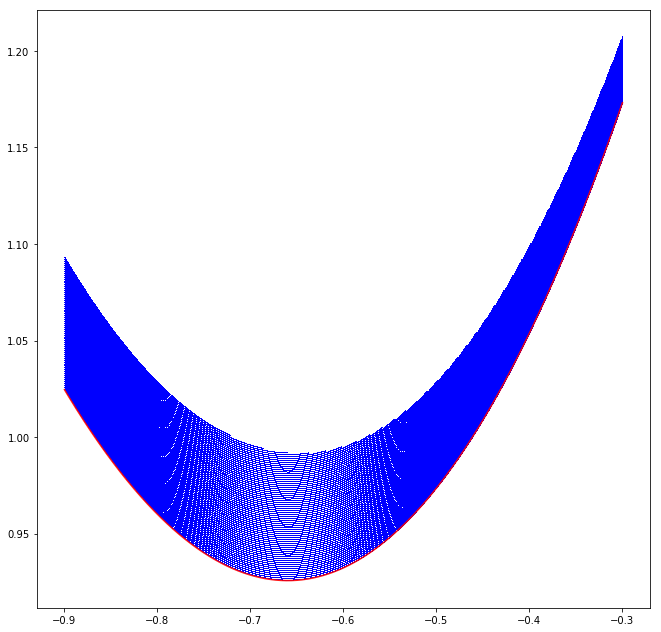

In [105]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.plot(b_sink3BU,a_sink3BU,',',color='blue')
plt.plot(b_listB,a_listB, '-', color='red', alpha = 0.9, markersize=3)

Text(0, 0.5, 'Trace ')

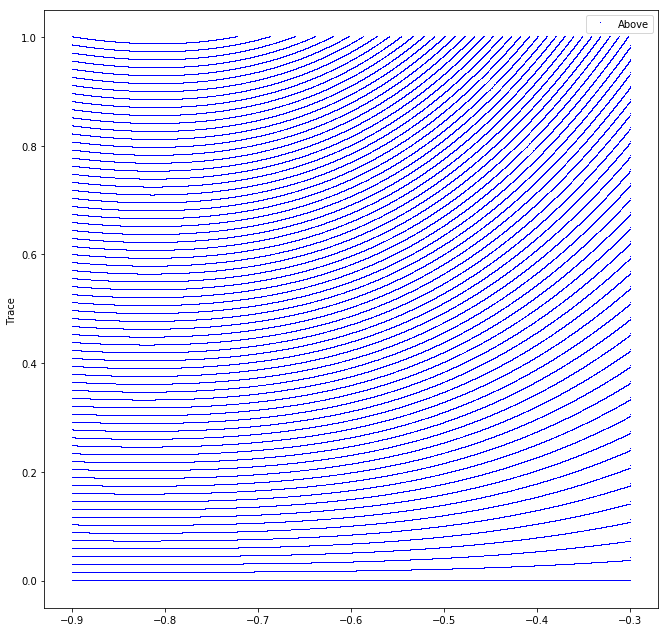

In [107]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.plot(b_sink3BU,tr3BU,',',color='blue')
plt.legend(['Above','Below'])
plt.ylabel('Trace ')

Text(0, 0.5, 'Y')

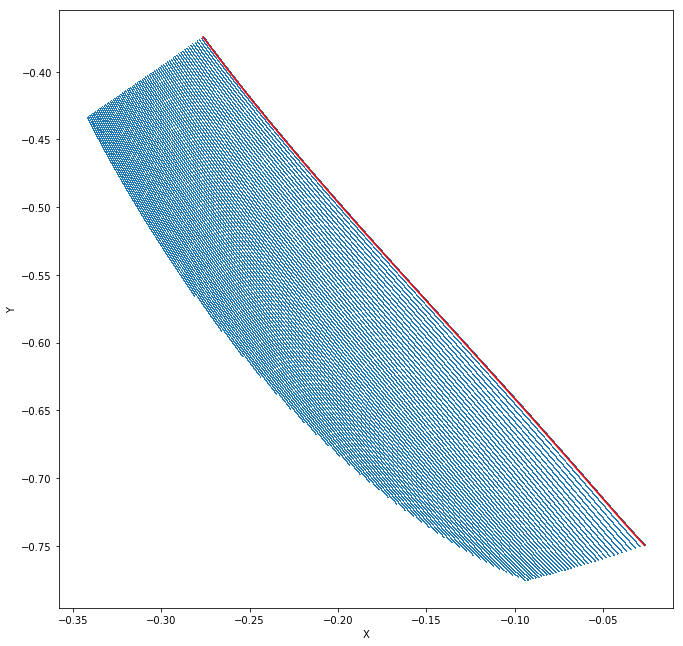

In [108]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1)

plt.plot(x_sink3BU, y_sink3BU,',')
plt.plot(x_listB,y_listB,color='red')
plt.xlabel('X')
plt.ylabel('Y')

In [109]:
global n, my_a,b,my_x,my_y
b_sink3BD,a_sink3BD,tr3BD = [],[],[]
x_sink3BD, y_sink3BD = [],[]
n=3

for i in range(len(b_listB)):
    print(i/len(b_listB) * 100)
    b_i = b_listB[i]
    a_i = a_listB[i]
    x_i = x_listB[i]
    y_i = y_listB[i]
    
    b_sink3BD.append(b_i)
    a_sink3BD.append(a_i)
    x_sink3BD.append(x_i)
    y_sink3BD.append(y_i)
    
    
    b = b_i
    my_x,my_y = x_i,y_i
    tr3BD.append(get_tr(a_i))
    for j in range(100000):
        a_i += -0.001
        my_a = a_i
        xy = optimize.fsolve(F_R2,[my_x,my_y],xtol = 0)
        #check if converged to fixed point
        xy1 = NhMap_n(my_a,b,xy[0],xy[1],1,1)
        fixed = False
        if(sci.linalg.norm([xy1[0] - xy[0],xy1[1] - xy[1]]) < 0.0001): #if fixed point
            fixed = True
            print('fixed')
            break
            
        flag = False
        if not fixed: #check if period 3
            #print(xy)
            my_x,my_y = xy[0],xy[1]
            
            XYn1 = NhMap_n(my_a,b,my_x,my_y,n,2)
            vec_diff = F_R2(xy)
            #print(vec_diff)
            #print(get_tr(a_i))
            
            
            try: 
                if  sci.linalg.norm(vec_diff) < 0.0001:
                    flag = True
                    
                for k in range(1,n):
                    XYnk = NhMap_n(my_a,b,my_x,my_y,k,1)
                    vec_diff = [my_x - XYnk[0], my_y - XYnk[1]]
                    #print(sci.linalg.norm(vec_diff))
                    if sci.linalg.norm(vec_diff) < 0.0001:
                        flag = False
                if get_tr(a_i) > 1:
                    flag = False
                    break
            except ValueError:
                flag = False
        if flag:
            #print('yay')
            b_sink3BD.append(b_i)
            a_sink3BD.append(a_i)
            tr3BD.append(get_tr(a_i))
            x_sink3BD.append(my_x)
            y_sink3BD.append(my_y)
            
            
            
print('Done')       

0.0
0.008332638946754439
0.016665277893508877
0.02499791684026331
0.033330555787017754
0.04166319473377219
0.04999583368052662
0.05832847262728105
0.06666111157403551
0.07499375052078994
0.08332638946754438
0.09165902841429881
0.09999166736105324
0.10832430630780768
0.1166569452545621
0.12498958420131656
0.13332222314807102
0.14165486209482542
0.14998750104157987
0.1583201399883343
0.16665277893508876
0.17498541788184319
0.18331805682859761
0.19165069577535204
0.19998333472210647
0.20831597366886093
0.21664861261561535
0.2249812515623698
0.2333138905091242
0.24164652945587867
0.24997916840263312
0.2583118073493876
0.26664444629614203
0.27497708524289644
0.28330972418965084
0.2916423631364053
0.29997500208315975
0.30830764102991415
0.3166402799766686
0.32497291892342306
0.3333055578701775
0.3416381968169319
0.34997083576368637
0.3583034747104408
0.36663611365719523
0.37496875260394963
0.3833013915507041
0.39163403049745854
0.39996666944421294
0.40829930839096745
0.41663194733772185
0.42

3.649695858678444
3.6580284976251978
3.666361136571952
3.6746937755187066
3.683026414465461
3.691359053412216
3.69969169235897
3.7080243313057246
3.716356970252479
3.724689609199233
3.7330222481459874
3.7413548870927427
3.749687526039497
3.758020164986251
3.7663528039330054
3.77468544287976
3.7830180818265142
3.791350720773269
3.7996833597200235
3.808015998666778
3.8163486376135323
3.8246812765602862
3.8330139155070415
3.841346554453796
3.84967919340055
3.8580118323473043
3.8663444712940587
3.874677110240813
3.883009749187568
3.8913423881343223
3.8996750270810767
3.908007666027831
3.916340304974585
3.9246729439213395
3.9330055828680948
3.9413382218148487
3.949670860761603
3.9580034997083575
3.966336138655112
3.9746687776018663
3.983001416548621
3.9913340554953756
3.99966669444213
4.007999333388884
4.016331972335639
4.024664611282393
4.032997250229148
4.041329889175902
4.049662528122656
4.057995167069411
4.066327806016165
4.0746604449629205
4.082993083909674
4.091325722856428
4.09965836

7.54937088575952
7.557703524706275
7.5660361636530284
7.574368802599783
7.582701441546538
7.591034080493292
7.599366719440047
7.6076993583868004
7.616031997333556
7.62436463628031
7.6326972752270645
7.641029914173819
7.6493625531205724
7.657695192067328
7.666027831014083
7.6743604699608365
7.682693108907592
7.691025747854345
7.6993583868011
7.707691025747854
7.7160236646946085
7.724356303641364
7.732688942588117
7.741021581534873
7.749354220481626
7.7576868594283805
7.766019498375136
7.774352137321889
7.782684776268645
7.791017415215398
7.799350054162153
7.807682693108909
7.816015332055662
7.824347971002417
7.83268060994917
7.841013248895925
7.849345887842679
7.857678526789434
7.8660111657361895
7.874343804682943
7.882676443629697
7.891009082576452
7.899341721523206
7.9076743604699615
7.916006999416715
7.92433963836347
7.932672277310224
7.941004916256979
7.949337555203733
7.957670194150487
7.966002833097242
7.974335472043996
7.982668110990751
7.991000749937505
7.99933338888426
8.007666

11.499041746521122
11.507374385467878
11.515707024414631
11.524039663361387
11.532372302308142
11.540704941254894
11.54903758020165
11.557370219148403
11.56570285809516
11.574035497041914
11.582368135988668
11.590700774935423
11.599033413882175
11.607366052828931
11.615698691775686
11.62403133072244
11.632363969669195
11.640696608615949
11.649029247562703
11.657361886509458
11.665694525456212
11.674027164402967
11.682359803349721
11.690692442296475
11.69902508124323
11.707357720189984
11.715690359136739
11.724022998083493
11.732355637030247
11.740688275977002
11.749020914923756
11.75735355387051
11.765686192817265
11.77401883176402
11.782351470710774
11.790684109657528
11.799016748604283
11.807349387551037
11.815682026497793
11.824014665444546
11.832347304391302
11.840679943338055
11.849012582284809
11.857345221231565
11.865677860178318
11.874010499125074
11.882343138071827
11.890675777018583
11.899008415965335
11.907341054912091
11.915673693858846
11.924006332805599
11.932338971752355

15.140404966252813
15.148737605199566
15.15707024414632
15.165402883093076
15.17373552203983
15.182068160986583
15.19040079993334
15.198733438880094
15.207066077826848
15.215398716773601
15.223731355720357
15.232063994667111
15.240396633613864
15.24872927256062
15.257061911507375
15.265394550454129
15.273727189400882
15.282059828347638
15.290392467294392
15.298725106241145
15.307057745187901
15.315390384134655
15.32372302308141
15.332055662028166
15.340388300974919
15.348720939921673
15.357053578868426
15.365386217815184
15.373718856761936
15.38205149570869
15.390384134655447
15.3987167736022
15.407049412548954
15.415382051495708
15.423714690442464
15.432047329389217
15.440379968335971
15.448712607282728
15.45704524622948
15.465377885176235
15.47371052412299
15.482043163069745
15.490375802016498
15.498708440963252
15.507041079910008
15.515373718856761
15.523706357803515
15.532038996750272
15.540371635697026
15.548704274643779
15.557036913590533
15.56536955253729
15.573702191484044
15.5

18.848429297558535
18.856761936505293
18.865094575452048
18.8734272143988
18.881759853345553
18.89009249229231
18.898425131239062
18.906757770185816
18.915090409132574
18.92342304807933
18.93175568702608
18.940088325972837
18.948420964919592
18.956753603866343
18.965086242813097
18.973418881759855
18.98175152070661
18.99008415965336
18.99841679860012
19.006749437546873
19.015082076493623
19.023414715440378
19.031747354387136
19.04007999333389
19.04841263228064
19.0567452712274
19.065077910174153
19.073410549120908
19.08174318806766
19.090075827014417
19.09840846596117
19.106741104907922
19.11507374385468
19.123406382801434
19.13173902174819
19.140071660694943
19.148404299641697
19.156736938588452
19.165069577535203
19.17340221648196
19.181734855428715
19.19006749437547
19.198400133322224
19.20673277226898
19.215065411215733
19.223398050162483
19.23173068910924
19.240063328055996
19.24839596700275
19.256728605949505
19.26506124489626
19.273393883843013
19.281726522789768
19.290059161736

22.614782101491542
22.623114740438297
22.63144737938505
22.639780018331805
22.64811265727856
22.656445296225314
22.66477793517207
22.673110574118823
22.681443213065577
22.689775852012332
22.698108490959086
22.70644112990584
22.714773768852595
22.72310640779935
22.731439046746104
22.73977168569286
22.748104324639616
22.756436963586367
22.76476960253312
22.773102241479876
22.78143488042663
22.789767519373385
22.79810015832014
22.806432797266897
22.814765436213648
22.823098075160402
22.831430714107157
22.839763353053915
22.848095992000665
22.85642863094742
22.864761269894178
22.87309390884093
22.881426547787683
22.889759186734437
22.898091825681195
22.906424464627946
22.9147571035747
22.92308974252146
22.93142238146821
22.939755020414964
22.948087659361722
22.956420298308476
22.964752937255227
22.97308557620198
22.98141821514874
22.98975085409549
22.998083493042245
23.006416131989003
23.014748770935757
23.023081409882508
23.031414048829262
23.03974668777602
23.048079326722775
23.056411965

26.339471710690777
26.34780434963753
26.356136988584282
26.36446962753104
26.372802266477795
26.381134905424545
26.389467544371303
26.397800183318054
26.406132822264812
26.414465461211567
26.422798100158317
26.431130739105075
26.43946337805183
26.44779601699858
26.45612865594534
26.464461294892093
26.472793933838844
26.481126572785602
26.48945921173236
26.497791850679107
26.506124489625865
26.514457128572623
26.522789767519374
26.531122406466128
26.53945504541288
26.547787684359637
26.55612032330639
26.564452962253142
26.5727856011999
26.581118240146655
26.589450879093405
26.597783518040163
26.60611615698692
26.614448795933672
26.622781434880427
26.631114073827185
26.639446712773935
26.64777935172069
26.656111990667448
26.6644446296142
26.672777268560953
26.681109907507704
26.689442546454462
26.69777518540122
26.706107824347967
26.714440463294725
26.722773102241483
26.731105741188234
26.739438380134988
26.747771019081746
26.756103658028497
26.76443629697525
26.77276893592201
26.7811015

30.155820348304307
30.164152987251065
30.172485626197815
30.18081826514457
30.189150904091328
30.19748354303808
30.205816181984837
30.21414882093159
30.222481459878342
30.2308140988251
30.239146737771854
30.247479376718605
30.255812015665363
30.264144654612114
30.272477293558868
30.280809932505626
30.289142571452377
30.29747521039913
30.30580784934589
30.31414048829264
30.322473127239398
30.330805766186153
30.339138405132903
30.34747104407966
30.355803683026416
30.364136321973167
30.372468960919925
30.38080159986668
30.38913423881343
30.397466877760188
30.40579951670694
30.414132155653697
30.42246479460045
30.430797433547202
30.43913007249396
30.447462711440714
30.455795350387465
30.464127989334223
30.472460628280977
30.480793267227728
30.489125906174486
30.49745854512124
30.50579118406799
30.51412382301475
30.522456461961507
30.530789100908258
30.539121739855013
30.547454378801763
30.55578701774852
30.564119656695276
30.572452295642027
30.580784934588785
30.58911757353554
30.597450212

33.94717106907758
33.95550370802433
33.963836346971085
33.97216898591784
33.980501624864594
33.98883426381135
33.9971669027581
34.00549954170486
34.01383218065161
34.022164819598366
34.03049745854512
34.038830097491875
34.04716273643863
34.055495375385384
34.06382801433214
34.07216065327889
34.08049329222565
34.0888259311724
34.097158570119156
34.10549120906591
34.113823848012665
34.12215648695942
34.13048912590618
34.13882176485293
34.14715440379968
34.15548704274644
34.16381968169319
34.172152320639945
34.1804849595867
34.188817598533454
34.19715023748021
34.20548287642696
34.21381551537372
34.22214815432048
34.230480793267226
34.23881343221398
34.24714607116074
34.25547871010749
34.263811349054244
34.272143988001005
34.28047662694775
34.28880926589451
34.29714190484126
34.305474543788016
34.31380718273477
34.322139821681525
34.33047246062828
34.33880509957504
34.34713773852179
34.35547037746854
34.363803016415304
34.37213565536205
34.380468294308805
34.38880093325557
34.397133572202

37.796850262478124
37.805182901424885
37.81351554037163
37.82184817931839
37.83018081826515
37.838513457211896
37.84684609615866
37.85517873510541
37.86351137405216
37.87184401299892
37.880176651945675
37.88850929089242
37.896841929839184
37.90517456878593
37.913507207732685
37.92183984667945
37.930172485626194
37.938505124572956
37.94683776351971
37.95517040246646
37.96350304141322
37.97183568035997
37.98016831930672
37.98850095825348
37.99683359720024
38.005166236146984
38.013498875093745
38.02183151404049
38.03016415298725
38.03849679193401
38.046829430880756
38.05516206982752
38.06349470877427
38.07182734772102
38.08015998666778
38.088492625614535
38.09682526456128
38.105157903508044
38.1134905424548
38.121823181401545
38.13015582034831
38.13848845929506
38.146821098241816
38.15515373718857
38.16348637613532
38.17181901508208
38.18015165402883
38.18848429297558
38.19681693192234
38.2051495708691
38.213482209815844
38.221814848762605
38.23014748770936
38.23848012665611
38.2468127656

41.621531539038415
41.62986417798516
41.638196816931924
41.64652945587868
41.65486209482543
41.66319473377219
41.67152737271894
41.679860011665696
41.68819265061245
41.696525289559204
41.70485792850596
41.71319056745271
41.72152320639947
41.72985584534622
41.73818848429298
41.74652112323973
41.754853762186485
41.76318640113324
41.771519040079994
41.77985167902675
41.7881843179735
41.79651695692026
41.80484959586701
41.813182234813766
41.82151487376052
41.829847512707275
41.83818015165403
41.846512790600784
41.85484542954754
41.86317806849429
41.87151070744105
41.8798433463878
41.888175985334556
41.89650862428131
41.904841263228064
41.91317390217482
41.92150654112157
41.92983918006833
41.93817181901508
41.94650445796184
41.95483709690859
41.963169735855345
41.9715023748021
41.979835013748854
41.98816765269561
41.99650029164236
42.00483293058912
42.01316556953587
42.021498208482626
42.02983084742938
42.038163486376135
42.04649612532289
42.054828764269644
42.0631614032164
42.0714940421631

45.39621698191817
45.40454962086493
45.41288225981168
45.421214898758436
45.42954753770519
45.437880176651944
45.4462128155987
45.45454545454545
45.46287809349221
45.47121073243897
45.47954337138572
45.48787601033247
45.49620864927923
45.50454128822598
45.512873927172734
45.52120656611949
45.52953920506624
45.537871844013
45.54620448295975
45.554537121906506
45.56286976085326
45.571202399800015
45.57953503874677
45.58786767769353
45.59620031664028
45.60453295558703
45.612865594533794
45.62119823348054
45.629530872427296
45.63786351137405
45.646196150320804
45.65452878926756
45.66286142821431
45.67119406716107
45.67952670610783
45.68785934505458
45.69619198400133
45.70452462294809
45.71285726189484
45.721189900841594
45.729522539788356
45.7378551787351
45.74618781768186
45.75452045662862
45.762853095575366
45.77118573452212
45.779518373468875
45.78785101241563
45.79618365136239
45.80451629030914
45.81284892925589
45.821181568202654
45.8295142071494
45.837846846096156
45.84617948504292
4

49.23756353637197
49.24589617531872
49.254228814265474
49.262561453212236
49.27089409215898
49.27922673110574
49.2875593700525
49.295892008999246
49.30422464794601
49.31255728689276
49.32088992583951
49.32922256478627
49.337555203733025
49.34588784267977
49.354220481626534
49.36255312057329
49.370885759520036
49.3792183984668
49.387551037413544
49.395883676360306
49.40421631530706
49.41254895425381
49.42088159320057
49.429214232147324
49.43754687109407
49.44587951004083
49.45421214898759
49.462544787934334
49.470877426881096
49.47921006582785
49.4875427047746
49.49587534372136
49.50420798266811
49.51254062161487
49.52087326056162
49.52920589950837
49.53753853845513
49.545871177401885
49.55420381634863
49.562536455295394
49.57086909424215
49.579201733188896
49.58753437213566
49.59586701108241
49.604199650029166
49.61253228897592
49.620864927922675
49.62919756686943
49.637530205816184
49.64586284476294
49.65419548370969
49.66252812265645
49.670860761603194
49.679193400549956
49.687526039

53.028914257145246
53.03724689609199
53.04557953503875
53.053912173985495
53.062244812932256
53.07057745187901
53.07891009082576
53.08724272977252
53.095575368719274
53.10390800766602
53.11224064661278
53.12057328555954
53.128905924506284
53.137238563453046
53.1455712023998
53.15390384134655
53.16223648029331
53.170569119240064
53.17890175818681
53.18723439713358
53.19556703608033
53.203899675027074
53.21223231397384
53.22056495292059
53.228897591867344
53.237230230814106
53.24556286976085
53.25389550870761
53.26222814765437
53.270560786601116
53.27889342554787
53.28722606449463
53.29555870344138
53.303891342388134
53.312223981334895
53.32055662028164
53.3288892592284
53.337221898175144
53.345554537121906
53.35388717606866
53.36221981501541
53.37055245396217
53.378885092908924
53.38721773185567
53.39555037080244
53.40388300974919
53.412215648695934
53.4205482876427
53.42888092658945
53.437213565536204
53.445546204482966
53.45387884342971
53.46221148237647
53.47054412132323
53.478876760

56.82859761686526
56.836930255812014
56.845262894758775
56.85359553370552
56.86192817265228
56.87026081159904
56.878593450545786
56.88692608949254
56.8952587284393
56.903591367386056
56.911924006332804
56.920256645279565
56.92858928422632
56.93692192317307
56.94525456211982
56.95358720106658
56.96191984001333
56.970252478960084
56.978585117906846
56.98691775685359
56.99525039580035
57.00358303474711
57.011915673693856
57.02024831264061
57.02858095158737
57.03691359053412
57.045246229480874
57.053578868427635
57.06191150737438
57.07024414632114
57.0785767852679
57.086909424214646
57.0952420631614
57.10357470210816
57.111907341054916
57.120239980001664
57.128572618948425
57.13690525789518
57.14523789684193
57.15357053578869
57.16190317473544
57.17023581368219
57.17856845262895
57.186901091575706
57.19523373052245
57.20356636946921
57.21189900841597
57.220231647362716
57.22856428630947
57.23689692525623
57.24522956420298
57.253562203149734
57.261894842096495
57.27022748104324
57.278560119

60.63661361553204
60.644946254478796
60.653278893425544
60.661611532372305
60.66994417131906
60.67827681026581
60.68660944921257
60.69494208815932
60.70327472710607
60.71160736605283
60.719940004999586
60.72827264394633
60.736605282893095
60.74493792183985
60.753270560786596
60.76160319973336
60.76993583868011
60.77826847762686
60.78660111657362
60.794933755520375
60.80326639446712
60.81159903341388
60.81993167236064
60.82826431130739
60.83659695025414
60.8449295892009
60.853262228147656
60.861594867094404
60.869927506041165
60.87826014498792
60.88659278393467
60.89492542288143
60.90325806182818
60.91159070077493
60.91992333972169
60.928255978668446
60.93658861761519
60.944921256561955
60.95325389550871
60.961586534455456
60.96991917340222
60.97825181234897
60.98658445129572
60.99491709024248
61.003249729189235
61.01158236813598
61.019915007082744
61.0282476460295
61.03658028497625
61.044912923923015
61.05324556286976
61.061578201816516
61.06991084076328
61.078243479710025
61.086576118

64.46962753103908
64.47796016998583
64.48629280893259
64.49462544787934
64.5029580868261
64.51129072577285
64.5196233647196
64.52795600366636
64.53628864261312
64.54462128155987
64.55295392050662
64.56128655945338
64.56961919840013
64.57795183734689
64.58628447629364
64.5946171152404
64.60294975418715
64.6112823931339
64.61961503208066
64.62794767102741
64.63628030997417
64.64461294892092
64.65294558786768
64.66127822681443
64.66961086576119
64.67794350470794
64.6862761436547
64.69460878260145
64.7029414215482
64.71127406049496
64.71960669944171
64.72793933838847
64.73627197733522
64.74460461628198
64.75293725522873
64.76126989417548
64.76960253312224
64.777935172069
64.78626781101575
64.7946004499625
64.80293308890926
64.81126572785601
64.81959836680277
64.82793100574952
64.83626364469627
64.84459628364303
64.85292892258978
64.86126156153654
64.86959420048329
64.87792683943005
64.8862594783768
64.89459211732355
64.90292475627031
64.91125739521706
64.91959003416382
64.92792267311057
64

68.32763936338638
68.33597200233314
68.34430464127989
68.35263728022665
68.3609699191734
68.36930255812015
68.37763519706691
68.38596783601366
68.39430047496042
68.40263311390717
68.41096575285393
68.41929839180068
68.42763103074743
68.43596366969419
68.44429630864096
68.4526289475877
68.46096158653445
68.46929422548122
68.47762686442796
68.48595950337472
68.49429214232148
68.50262478126822
68.51095742021498
68.51929005916175
68.52762269810849
68.53595533705524
68.54428797600201
68.55262061494875
68.5609532538955
68.56928589284226
68.57761853178901
68.58595117073577
68.59428380968252
68.60261644862928
68.61094908757603
68.61928172652279
68.62761436546954
68.6359470044163
68.64427964336305
68.6526122823098
68.66094492125656
68.66927756020331
68.67761019915008
68.68594283809682
68.69427547704358
68.70260811599034
68.71094075493708
68.71927339388384
68.72760603283061
68.73593867177735
68.7442713107241
68.75260394967087
68.76093658861761
68.76926922756437
68.77760186651113
68.7859345054578

72.23564702941422
72.24397966836096
72.25231230730772
72.26064494625449
72.26897758520123
72.27731022414798
72.28564286309475
72.29397550204149
72.30230814098825
72.31064077993501
72.31897341888175
72.32730605782851
72.33563869677528
72.34397133572202
72.35230397466877
72.36063661361554
72.3689692525623
72.37730189150903
72.3856345304558
72.39396716940256
72.4022998083493
72.41063244729607
72.41896508624282
72.42729772518956
72.43563036413633
72.44396300308308
72.45229564202982
72.46062828097658
72.46896091992335
72.47729355887009
72.48562619781684
72.49395883676361
72.50229147571035
72.5106241146571
72.51895675360387
72.52728939255061
72.53562203149737
72.54395467044414
72.55228730939088
72.56061994833763
72.5689525872844
72.57728522623114
72.5856178651779
72.59395050412466
72.60228314307142
72.61061578201816
72.61894842096493
72.62728105991168
72.63561369885842
72.64394633780519
72.65227897675194
72.66061161569868
72.66894425464545
72.67727689359221
72.68560953253895
72.6939421714857

76.1353220564953
76.14365469544204
76.1519873343888
76.16031997333556
76.1686526122823
76.17698525122907
76.18531789017582
76.19365052912256
76.20198316806933
76.21031580701609
76.21864844596283
76.2269810849096
76.23531372385635
76.24364636280309
76.25197900174986
76.26031164069661
76.26864427964335
76.27697691859012
76.28530955753688
76.29364219648363
76.30197483543039
76.31030747437714
76.3186401133239
76.32697275227063
76.3353053912174
76.34363803016416
76.3519706691109
76.36030330805767
76.36863594700442
76.37696858595116
76.38530122489793
76.39363386384468
76.40196650279142
76.4102991417382
76.41863178068495
76.42696441963169
76.43529705857846
76.44362969752521
76.45196233647195
76.46029497541872
76.46862761436547
76.47696025331221
76.48529289225898
76.49362553120574
76.50195817015248
76.51029080909925
76.518623448046
76.52695608699275
76.53528872593951
76.54362136488626
76.55195400383302
76.56028664277977
76.56861928172653
76.57695192067328
76.58528455962004
76.59361719856679
76

80.02666444462962
80.03499708357637
80.04332972252313
80.05166236146988
80.05999500041663
80.06832763936339
80.07666027831014
80.0849929172569
80.09332555620365
80.1016581951504
80.10999083409716
80.11832347304392
80.12665611199067
80.13498875093742
80.14332138988418
80.15165402883093
80.15998666777769
80.16831930672444
80.1766519456712
80.18498458461795
80.1933172235647
80.20164986251146
80.20998250145821
80.21831514040497
80.22664777935172
80.23498041829848
80.24331305724523
80.25164569619199
80.25997833513874
80.2683109740855
80.27664361303225
80.284976251979
80.29330889092576
80.30164152987251
80.30997416881927
80.31830680776602
80.32663944671278
80.33497208565953
80.34330472460628
80.35163736355304
80.3599700024998
80.36830264144655
80.3766352803933
80.38496791934006
80.39330055828681
80.40163319723356
80.40996583618032
80.41829847512707
80.42663111407383
80.43496375302058
80.44329639196734
80.45162903091409
80.45996166986085
80.4682943088076
80.47662694775435
80.48495958670111
80

83.92633947171069
83.93467211065744
83.9430047496042
83.95133738855095
83.95967002749771
83.96800266644446
83.97633530539122
83.98466794433797
83.99300058328473
84.00133322223148
84.00966586117823
84.01799850012499
84.02633113907174
84.0346637780185
84.04299641696525
84.051329055912
84.05966169485876
84.06799433380552
84.07632697275227
84.08465961169902
84.09299225064578
84.10132488959253
84.10965752853929
84.11799016748604
84.1263228064328
84.13465544537955
84.1429880843263
84.15132072327306
84.15965336221981
84.16798600116657
84.17631864011332
84.18465127906008
84.19298391800683
84.20131655695359
84.20964919590034
84.2179818348471
84.22631447379385
84.2346471127406
84.24297975168736
84.25131239063411
84.25964502958087
84.26797766852762
84.27631030747438
84.28464294642113
84.29297558536788
84.30130822431464
84.3096408632614
84.31797350220816
84.3263061411549
84.33463878010166
84.34297141904842
84.35130405799516
84.35963669694192
84.36796933588867
84.37630197483543
84.38463461378218
84

87.83434713773852
87.84267977668527
87.85101241563204
87.85934505457878
87.86767769352554
87.8760103324723
87.88434297141904
87.8926756103658
87.90100824931257
87.90934088825931
87.91767352720606
87.92600616615283
87.93433880509957
87.94267144404633
87.95100408299308
87.95933672193983
87.96766936088659
87.97600199983334
87.9843346387801
87.99266727772685
88.0009999166736
88.00933255562036
88.01766519456712
88.02599783351387
88.03433047246062
88.04266311140738
88.05099575035413
88.0593283893009
88.06766102824764
88.0759936671944
88.08432630614116
88.0926589450879
88.10099158403466
88.10932422298143
88.11765686192817
88.12598950087492
88.13432213982169
88.14265477876843
88.15098741771519
88.15932005666195
88.1676526956087
88.17598533455545
88.18431797350222
88.19265061244896
88.20098325139571
88.20931589034248
88.21764852928922
88.22598116823598
88.23431380718273
88.2426464461295
88.25097908507624
88.259311724023
88.26764436296976
88.2759770019165
88.28430964086326
88.29264227981002
88.3

91.75068744271312
91.75902008165986
91.76735272060662
91.77568535955338
91.78401799850012
91.79235063744689
91.80068327639364
91.80901591534038
91.81734855428715
91.8256811932339
91.83401383218064
91.8423464711274
91.85067911007417
91.85901174902091
91.86734438796766
91.87567702691443
91.88400966586117
91.89234230480793
91.9006749437547
91.90900758270143
91.91734022164819
91.92567286059496
91.9340054995417
91.94233813848845
91.95067077743522
91.95900341638196
91.96733605532872
91.97566869427548
91.98400133322224
91.99233397216898
92.00066661111575
92.0089992500625
92.01733188900924
92.02566452795601
92.03399716690276
92.0423298058495
92.05066244479627
92.05899508374303
92.06732772268977
92.07566036163654
92.08399300058329
92.09232563953003
92.1006582784768
92.10899091742355
92.1173235563703
92.12565619531705
92.13398883426382
92.14232147321056
92.15065411215731
92.15898675110408
92.16731939005084
92.17565202899758
92.18398466794434
92.1923173068911
92.20064994583784
92.20898258478461
9

95.60869927506042
95.61703191400717
95.62536455295391
95.63369719190068
95.64202983084743
95.65036246979417
95.65869510874094
95.6670277476877
95.67536038663445
95.6836930255812
95.69202566452796
95.70035830347472
95.70869094242146
95.71702358136822
95.72535622031498
95.73368885926172
95.74202149820849
95.75035413715524
95.75868677610198
95.76701941504875
95.7753520539955
95.78368469294224
95.79201733188901
95.80034997083577
95.80868260978251
95.81701524872928
95.82534788767603
95.83368052662277
95.84201316556954
95.8503458045163
95.85867844346303
95.8670110824098
95.87534372135656
95.8836763603033
95.89200899925007
95.90034163819682
95.90867427714358
95.91700691609033
95.92533955503708
95.93367219398384
95.94200483293059
95.95033747187735
95.9586701108241
95.96700274977086
95.97533538871761
95.98366802766436
95.9920006666111
96.00033330555787
96.00866594450463
96.01699858345137
96.02533122239814
96.03366386134489
96.04199650029163
96.0503291392384
96.05866177818515
96.0669944171319
96

99.45004582951421
99.45837846846096
99.46671110740772
99.47504374635447
99.48337638530123
99.49170902424798
99.50004166319474
99.50837430214149
99.51670694108824
99.525039580035
99.53337221898175
99.54170485792851
99.55003749687526
99.55837013582202
99.56670277476877
99.57503541371553
99.58336805266228
99.59170069160903
99.60003333055579
99.60836596950254
99.6166986084493
99.62503124739605
99.6333638863428
99.64169652528956
99.65002916423632
99.65836180318307
99.66669444212982
99.67502708107658
99.68335972002333
99.69169235897009
99.70002499791684
99.7083576368636
99.71669027581035
99.7250229147571
99.73335555370386
99.74168819265061
99.75002083159737
99.75835347054412
99.76668610949088
99.77501874843763
99.78335138738439
99.79168402633114
99.8000166652779
99.80834930422465
99.8166819431714
99.82501458211816
99.83334722106491
99.84167986001167
99.85001249895842
99.85834513790518
99.86667777685193
99.87501041579868
99.88334305474544
99.89167569369219
99.90000833263895
99.9083409715857
9

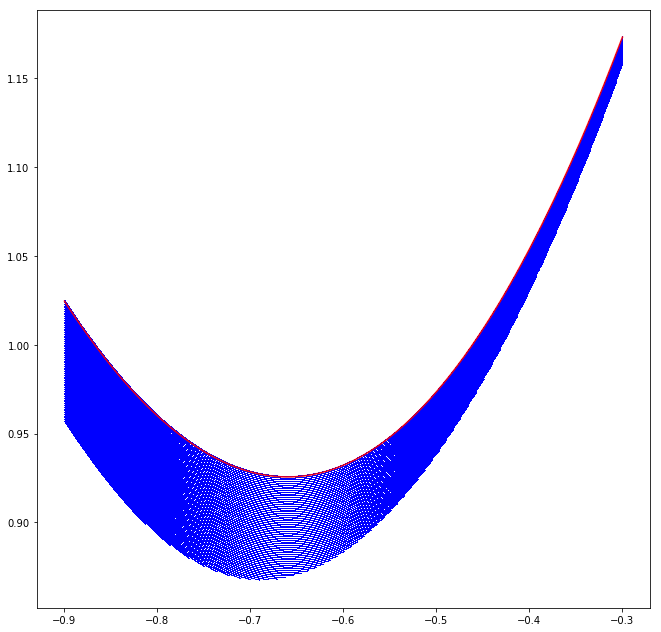

In [111]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.plot(b_sink3BD,a_sink3BD,',',color='blue')
plt.plot(b_listB,a_listB, '-', color='red', alpha = 0.9, markersize=3)

Text(0, 0.5, 'Trace ')

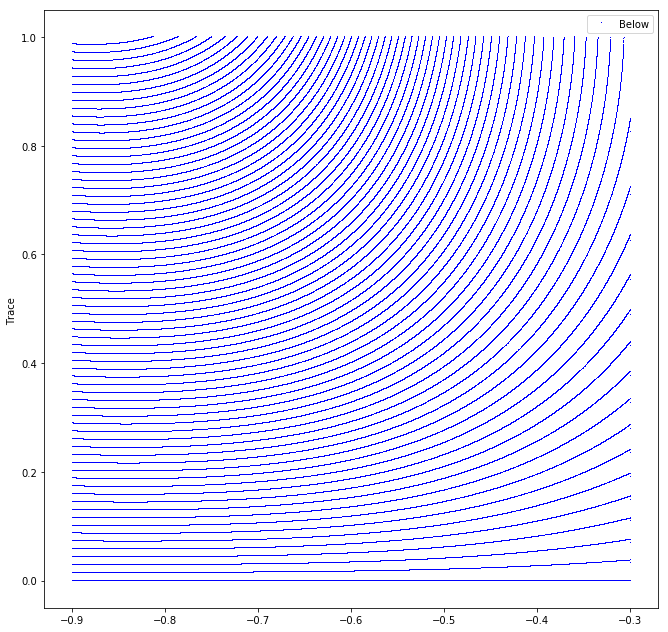

In [113]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.plot(b_sink3BD,tr3BD,',',color='blue')
plt.legend(['Below','Below'])
plt.ylabel('Trace ')

Text(0, 0.5, 'Y')

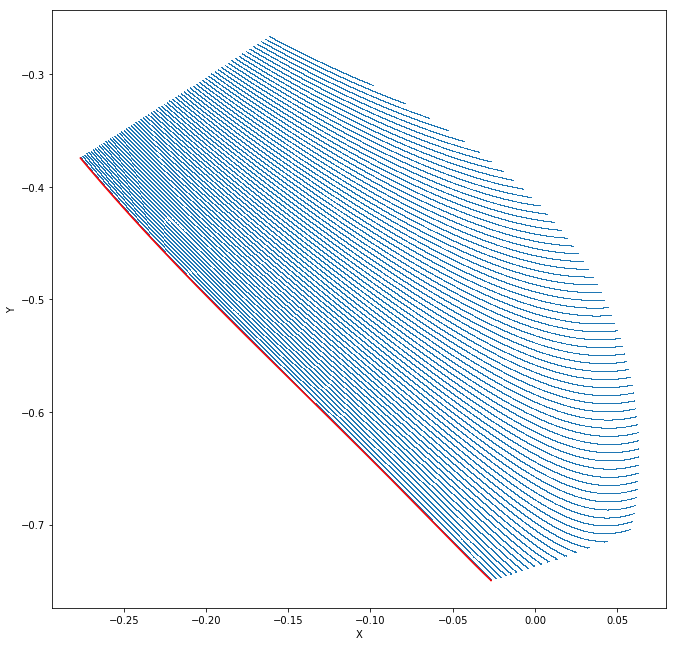

In [114]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1)

plt.plot(x_sink3BD, y_sink3BD,',')
plt.plot(x_listB,y_listB,color='red')
plt.xlabel('X')
plt.ylabel('Y')

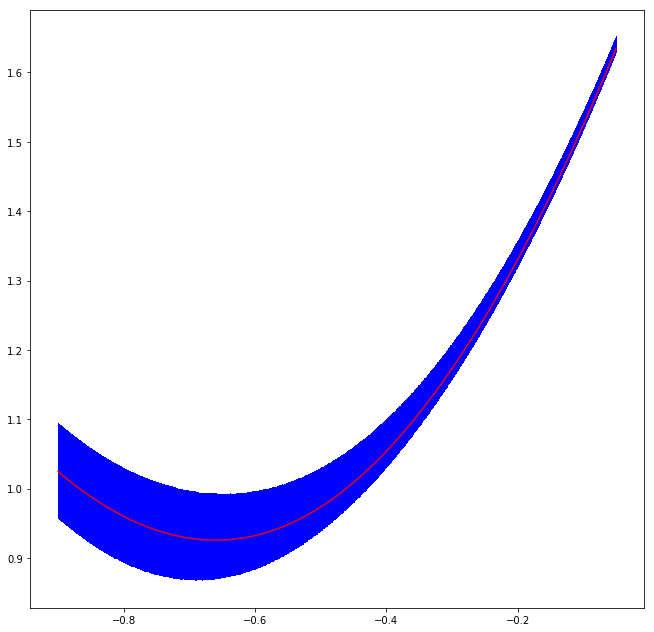

In [117]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.plot(b_sink3BU,a_sink3BU,',',color='blue')
plt.plot(b_sink3BD,a_sink3BD,',',color='blue')
plt.plot(b_sink3,a_sink3,',',color='blue')
plt.plot(b_sink3D,a_sink3D,',',color='blue')
plt.plot(b_listB,a_listB, '-', color='red', alpha = 0.9, markersize=3)
plt.plot(b_listF,a_listF, '-', color='red', alpha = 0.9, markersize=3)

Text(0, 0.5, 'Trace ')

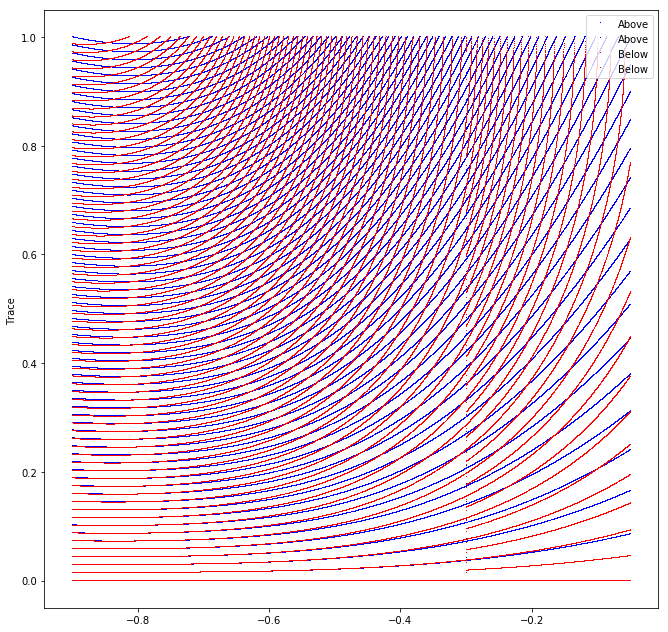

In [120]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1) 
plt.plot(b_sink3,tr3,',',color='blue')
plt.plot(b_sink3BU,tr3BU,',',color='blue')

plt.plot(b_sink3D,tr3D,',',color='red')
plt.plot(b_sink3BD,tr3BD,',',color='red')
plt.legend(['Above','Above','Below','Below'])

plt.ylabel('Trace ')

Text(0, 0.5, 'Y')

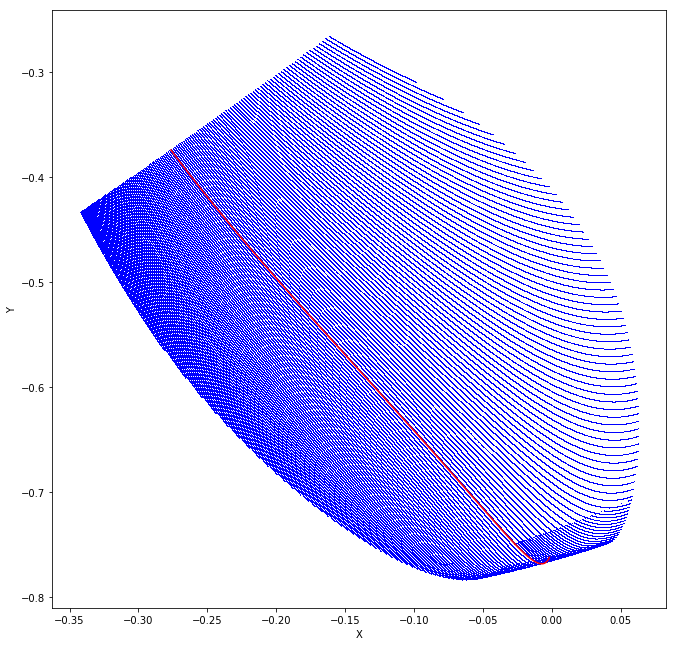

In [122]:
fig = plt.figure(figsize = (11,11))
ax = fig.add_subplot(1, 1, 1)

plt.plot(x_sink3BD, y_sink3BD,',',color='blue')
plt.plot(x_sink3BU, y_sink3BU,',',color='blue')
plt.plot(x_sink3, y_sink3,',',color='blue')
plt.plot(x_sink3D, y_sink3D,',',color='blue')
plt.plot(x_listB,y_listB,color='red')
plt.plot(x_listF,y_listF,color='red')
plt.xlabel('X')
plt.ylabel('Y')

In [126]:
for i in range(100):
    if (10**i % 91 == 1):
        print(i)

0
6
12
18
24
30
36
42
48
54
60
66
72
78
84
90
96


In [140]:
for i in range(10000000):
    if((1+91*i) % 10**6 == 0):
        print(i, 91*i)

10989 999999
1010989 91999999
2010989 182999999
3010989 273999999
4010989 364999999
5010989 455999999
6010989 546999999
7010989 637999999
8010989 728999999
9010989 819999999


In [11]:
length = 100000000
x1 = []
x2 = np.zeros(length)
for i in range(length):
    x1.append(1)
print('done 1')
for i in range(length):
    x2[i] = 1
print('done 2')

done 1
done 2
